# **Graduation Project -- Uber Analaysis**

# **Business Problem Overview**

### **Uber: Maximising Revenue per Driver Hour (RDH) through Demand Optimisation**

Bangalore, known for its **heavy traffic congestion, fluctuating ride demand, and diverse commuting patterns**, presents significant challenges for Uber, including **inefficient driver deployment, high idle times, and unpredictable trip profitability**. Uber aims to optimize the demand-supply balance, minimize idle time, and enhance earnings per trip. Addressing these challenges will improve driver earnings while ensuring better operational efficiency.

### **Objective**

The goal of this project is to provide suggestions for optimizing **Revenue per Driver Hour (RDH)**, improving **fleet efficiency**, and enhancing **overall revenue strategies**. The analysis will focus on:
- Demand trends across Bangalore to understand ride patterns.
- Driver earnings per trip/hour and factors influencing RDH.
- Fleet efficiency, focusing on idle time and driver deployment.
- Trends and insights that can contribute to improving RDH.
- Assessing factors influencing RDH, beyond predefined ones, to uncover further insights.


# **Dataset Overview**



*   **Dataset Name**: Uber Ride DataSet
*   **Number of Rows:** 6500000
*  **Number of Columns:** 16


## **Column Definitions**

1. **VendorID**:
   Identifier for the taxi service provider.

2. **tpep_pickup_datetime**:
   The date and time when the Uber trip started.

3. **tpep_dropoff_datetime**:
   The date and time when the Uber trip ended.

4. **passenger_count**:
   The total number of passengers in the trip.

5. **trip_distance**:
   The distance of the trip measured in kilometers (KMs).

6. **PULocationID**:
   The unique location ID where the passenger was picked up.

7. **DOLocationID**:
   The unique location ID where the passenger was dropped off.

8. **payment_type**:
   The method of payment used for the trip.

9. **fare_amount**:
   The base fare for the trip, excluding additional charges.

10. **extra**:
    Additional charges such as late-night surcharges or peak-hour fees.

11. **gst**:
    Goods and Services Tax (GST) applied to the trip.

12. **tip_amount**:
    The tip given to the driver.

13. **tolls_amount**:
    Charges for tolls during the trip.

14. **improvement_surcharge**:
    A fixed surcharge used for Uber service improvements.

15. **total_amount**:
    The total fare amount, including base fare, extras, tolls, and taxes.

16. **congestion_surcharge**:
    An additional charge applied for trips in congested areas.


#**Analysis & Visualization**



##***I. Data Importing,Cleaning and Identifying Outliers***

###**1.Importing Necessary Libraries**

In [ ]:
#For data manipulation and analysis
import pandas as pd
#For numerical computations
import numpy as np
#For data visualization
import matplotlib.pyplot as plt
#For advanced data  visualization
import seaborn as sns

###**2.Loading the dataset from Google Drive**

In [ ]:
# Install gdown
!pip install gdown

# Import necessary libraries
import gdown
import pandas as pd

# Set the file ID and create a download URL
file_id = "1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG"

# Construct the file's download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Set the output file name
output_file = "uber_dataset.csv"

# Download the file
gdown.download(download_url, output_file, quiet=False)

# Load the CSV file into a Pandas DataFrame
uber_data = pd.read_csv(output_file)


Downloading...
From (original): https://drive.google.com/uc?id=1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG
From (redirected): https://drive.google.com/uc?id=1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG&confirm=t&uuid=ef349bd9-f492-48db-a264-a6abba2ffa86
To: /content/uber_dataset.csv
100%|██████████| 754M/754M [00:11<00:00, 66.7MB/s]


###**3. Dataset - Sample View**

In [ ]:
uber_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'gst', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

In [ ]:
#Displaying the sample of  imported Data
print("\033[1mDataset - Sample ") #\033[1m is used to print a bold header for clarity
display(uber_data.head())

Dataset - Sample 


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.9,238,239,1.0,283.73,141.87,23.64,69.52,0.0,14.18,532.93,118.22
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.9,239,238,1.0,331.01,141.87,23.64,70.93,0.0,14.18,581.63,118.22
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,1.0,238,238,1.0,283.73,141.87,23.64,47.29,0.0,14.18,510.71,118.22
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,1.3,238,151,1.0,260.08,23.64,23.64,64.31,0.0,14.18,385.87,0.00
4,1,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,193,193,2.0,165.51,23.64,23.64,0.00,0.0,14.18,226.98,0.00


###**4. Displaying the shape of the dataset**

In [ ]:
print("\033[1m The Number of Rows and Columns in the dataset are: ")  # \033[1m is used to print a bold header for clarity
uber_data.shape

 The Number of Rows and Columns in the dataset are: 


(6500000, 16)



```
# This is formatted as code
```

###**5. Displaying dataset information**

In [ ]:
print("\nDataset Information")
uber_data.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500000 entries, 0 to 6499999
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           float64
 8   fare_amount            float64
 9   extra                  float64
 10  gst                    float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
dtypes: float64(11), int64(3), object(2)
memory usage: 793.5+ MB


###**6. Checking for Duplicate Values in the Dataset**

In [ ]:
#counting the Number of duplicate Rows
duplicate_count = uber_data.duplicated().sum()
print(f"\033[1mNumber of duplicate rows in the dataset are:")
duplicate_count

Number of duplicate rows in the dataset are:


np.int64(12949)

In [ ]:
#priniting sample duplicate data
duplicate_data = uber_data[uber_data.duplicated()].head(5)

print(f"\033[1mSample of Duplicate Data Rows:")
duplicate_data

Sample of Duplicate Data Rows:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6359270,1,01/06/2020 06:14:00 AM,01/06/2020 07:03:00 AM,NaN,34.7,72,116,NaN,2226.31,130.04,23.64,0.0,289.4,14.18,2683.58,0.0
6359272,1,01/06/2020 06:52:00 AM,01/06/2020 07:25:00 AM,NaN,16.7,89,68,NaN,1525.98,130.04,23.64,0.0,289.4,14.18,1983.25,0.0
6359274,1,01/06/2020 06:10:00 AM,01/06/2020 06:46:29 AM,NaN,13.9,76,45,NaN,1809.70,130.04,0.00,0.0,0.0,14.18,1953.93,0.0
6359276,1,01/06/2020 06:11:00 AM,01/06/2020 06:42:00 AM,NaN,10.6,213,152,NaN,882.39,130.04,23.64,0.0,289.4,14.18,1339.66,0.0
6359278,1,01/06/2020 06:30:00 AM,01/06/2020 07:11:00 AM,NaN,20.4,169,249,NaN,2414.04,130.04,23.64,0.0,0.0,14.18,2581.92,0.0


**Conclusion**: As the Uber dataset has negligible duplicate values representing multiple trips for a single vendor, retaining them is ideal for further analysis.

###**7. Displaying the data summary statistics.**

In [ ]:
# Checking summary statistics of the dataset using describe() function.

print("\033[1mSummary Statistics of the Dataset")
uber_data.describe()

Summary Statistics of the Dataset


,VendorID,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6500000.0,6.420771e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.420771e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06
mean,1.0,1.515719e+00,4.714353e+00,1.645881e+02,1.625559e+02,1.270356e+00,6.020947e+02,5.252278e+01,2.327745e+01,1.033724e+02,1.655467e+01,1.408472e+01,8.839614e+02,1.074429e+02
std,0.0,1.151972e+00,1.342376e+02,6.562886e+01,6.996151e+01,4.741247e-01,5.762674e+02,5.952419e+01,3.484334e+00,1.302581e+02,8.355223e+01,1.601577e+00,6.993049e+02,3.500532e+01
min,1.0,0.000000e+00,-4.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,-5.854230e+04,-1.276770e+03,-2.364000e+01,-4.303190e+03,-1.690060e+03,-1.418000e+01,-5.874563e+04,-1.182200e+02
25%,1.0,1.000000e+00,1.500000e+00,1.320000e+02,1.130000e+02,1.000000e+00,3.073700e+02,0.000000e+00,2.364000e+01,0.000000e+00,0.000000e+00,1.418000e+01,5.277300e+02,1.182200e+02
50%,1.0,1.000000e+00,2.600000e+00,1.620000e+02,1.620000e+02,1.000000e+00,4.255900e+02,2.364000e+01,2.364000e+01,9.221000e+01,0.000000e+00,1.418000e+01,6.762200e+02,1.182200e+02
75%,1.0,2.000000e+00,4.700000e+00,2.340000e+02,2.340000e+02,2.000000e+00,6.620300e+02,1.182200e+02,2.364000e+01,1.352300e+02,0.000000e+00,1.418000e+01,9.363000e+02,1.182200e+02
max,1.0,9.000000e+00,3.363841e+05,2.650000e+02,2.650000e+02,5.000000e+00,2.016825e+05,5.343990e+03,1.456460e+03,5.201658e+04,4.305554e+04,1.418000e+01,2.018385e+05,1.300400e+02


###**8. Identifying and Handling Missing/Null  values in the dataset**

In [ ]:
# Identifying distribution of missing values and their percentages
def data_missing_values_percentage(df):
    missing_data  = df.isnull().sum().sort_values(ascending=False)
    # Removing Columns where Missing Values are 0
    total_missing = missing_data[missing_data > 0]
    percent_missing = ((total_missing / df.shape[0]) * 100).round(2) # Round to 2 decimal place
    total_values = df.shape[0]  # Total rows in the dataframe

    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent (%)'])
    missing_data['Total Values'] = total_values  # Add total values for each column
    return missing_data

data_missing_values_percentage(uber_data)

,Total Missing,Percent (%),Total Values
passenger_count,79229,1.22,6500000
payment_type,79229,1.22,6500000


<Axes: >

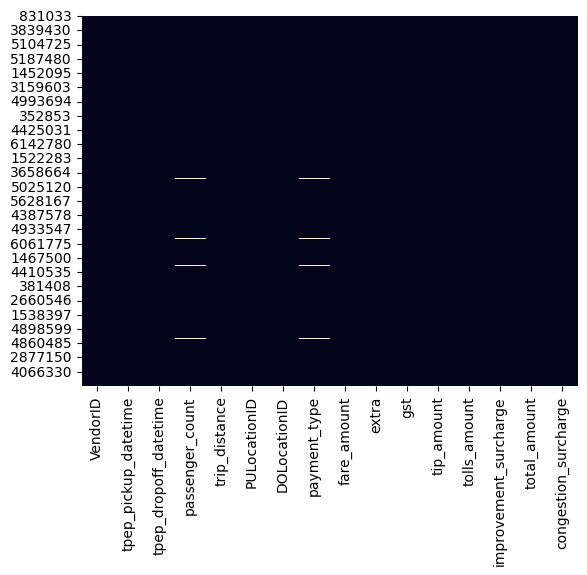

In [ ]:
# Visualizing the missing values using a heatmeap
# plotting Sample 10% of the missing values(NaNs) as a heatmap,hiding the color bar
sample_data = uber_data.sample(frac=0.010)
sns.heatmap(sample_data.isnull(), cbar=False)

####*a. Imputing values for `passenger_count`*

In [ ]:
# checking correlation of numerical columns with 'passenger_count'

# Computing correlation and sorting in descending order
correlation = uber_data.select_dtypes(include=[np.number]).corr()['passenger_count'].sort_values(ascending=False)
print(correlation)

# passagner_count as very low relationship with other columns so impututing with mean of the passagner_count for the missing_values
uber_data['passenger_count'].fillna(uber_data['passenger_count'].mean(), inplace=True)

passenger_count          1.000000
congestion_surcharge     0.013538
trip_distance            0.010508
payment_type             0.010049
total_amount             0.006533
fare_amount              0.006447
improvement_surcharge    0.004477
gst                      0.004460
tolls_amount             0.004019
tip_amount              -0.001022
DOLocationID            -0.003494
PULocationID            -0.004145
extra                   -0.153412
VendorID                      NaN
Name: passenger_count, dtype: float64


<ipython-input-91-4187980dccfc>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['passenger_count'].fillna(uber_data['passenger_count'].mean(), inplace=True)


####*b. Imputing values for `payment_type`*

In [ ]:
# checking correlation of numerical columns with 'passenger_count'

# Computing correlation and sorting in descending order
correlation = uber_data.select_dtypes(include=[np.number]).corr()['payment_type'].sort_values(ascending=False)
print(correlation)

#as payment_type does not have any relationship with other columns as part further analysis
# will be creating new column payment_type_category which correlates with payment_type such as
# 1 - UPI so impututing the missing values with 0 as Unknown Category
uber_data['payment_type'].fillna(0, inplace=True)

payment_type             1.000000
passenger_count          0.010049
trip_distance           -0.015759
extra                   -0.029475
tolls_amount            -0.029728
PULocationID            -0.030541
DOLocationID            -0.031297
fare_amount             -0.047762
total_amount            -0.141427
gst                     -0.191272
congestion_surcharge    -0.202383
improvement_surcharge   -0.234100
tip_amount              -0.456056
VendorID                      NaN
Name: payment_type, dtype: float64


<ipython-input-92-4e6230e81cdf>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['payment_type'].fillna(0, inplace=True)


###**9.Correcting Datatypes**

In [ ]:
#Displaying the data types of each column in the dataset
uber_data.dtypes

,0
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
PULocationID,int64
DOLocationID,int64
payment_type,float64
fare_amount,float64
extra,float64


#### *a. Converting datatype of tpep_pickup_datetime and tpep_dropoff_datetime to `datetime64`.*

In [ ]:

# tpep_pickup_datetime' to datetime with specified format and using 'coerce' to handle invalid formats gracefully
uber_data['tpep_pickup_datetime'] = pd.to_datetime(
    uber_data['tpep_pickup_datetime'],
    format='%m/%d/%Y %I:%M:%S %p',  # Format: MM/DD/YYYY HH:MM:SS AM/PM
    errors='coerce'
)

# 'tpep_dropoff_datetime' to datetime with specified  format and using 'coerce' to handle invalid formats gracefully
uber_data['tpep_dropoff_datetime'] = pd.to_datetime(
    uber_data['tpep_dropoff_datetime'],
    format='%m/%d/%Y %I:%M:%S %p', # Format: MM/DD/YYYY HH:MM:SS AM/PM
    errors='coerce'
)

In [ ]:
print(f"Invalid rows after conversion: {uber_data['tpep_pickup_datetime'].isna().sum()}")

Invalid rows after conversion: 0


#### *b. Converting datatype of  passenger_count  to `int64`.*

In [ ]:
print("before datatype conversion ")
uber_data['passenger_count'].head(5)

uber_data['passenger_count'] = uber_data['passenger_count'].astype('int64')
print("\n\nafter datatype conversion ")
uber_data['passenger_count'].head(5)

before datatype conversion 


after datatype conversion 


,passenger_count
0,1
1,1
2,1
3,1
4,1


#### *c. Converting datatype of  payment_type  to `int64`.*

In [ ]:
print("before datatype conversion ")
uber_data['payment_type'].head(5)

uber_data['payment_type'] = uber_data['passenger_count'].astype('int64')
print("\n\nafter datatype conversion ")
uber_data['payment_type'].head(5)

before datatype conversion 


after datatype conversion 


,payment_type
0,1
1,1
2,1
3,1
4,1


###**10.Checking Outliers**

####*a.Checking Outliers for all Numeric columns*

In [ ]:
# Selecting only numeric columns
numeric_data = uber_data.select_dtypes(include=['number'])

# Compute IQR for numerical columns
Q1 = numeric_data.quantile(0.25)  # 25th percentile
Q3 = numeric_data.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()

# Print outliers for each column
print("Outliers detected per column:")
print(outliers)

Outliers detected per column:
VendorID                      0
passenger_count          487951
trip_distance            741286
PULocationID                  0
DOLocationID                  0
payment_type             487951
fare_amount              642577
extra                      8134
gst                       80510
tip_amount               292720
tolls_amount             342062
improvement_surcharge     23909
total_amount             656855
congestion_surcharge     576964
dtype: int64


####b. **Plotting outliers using boxplot to identify extreme values**

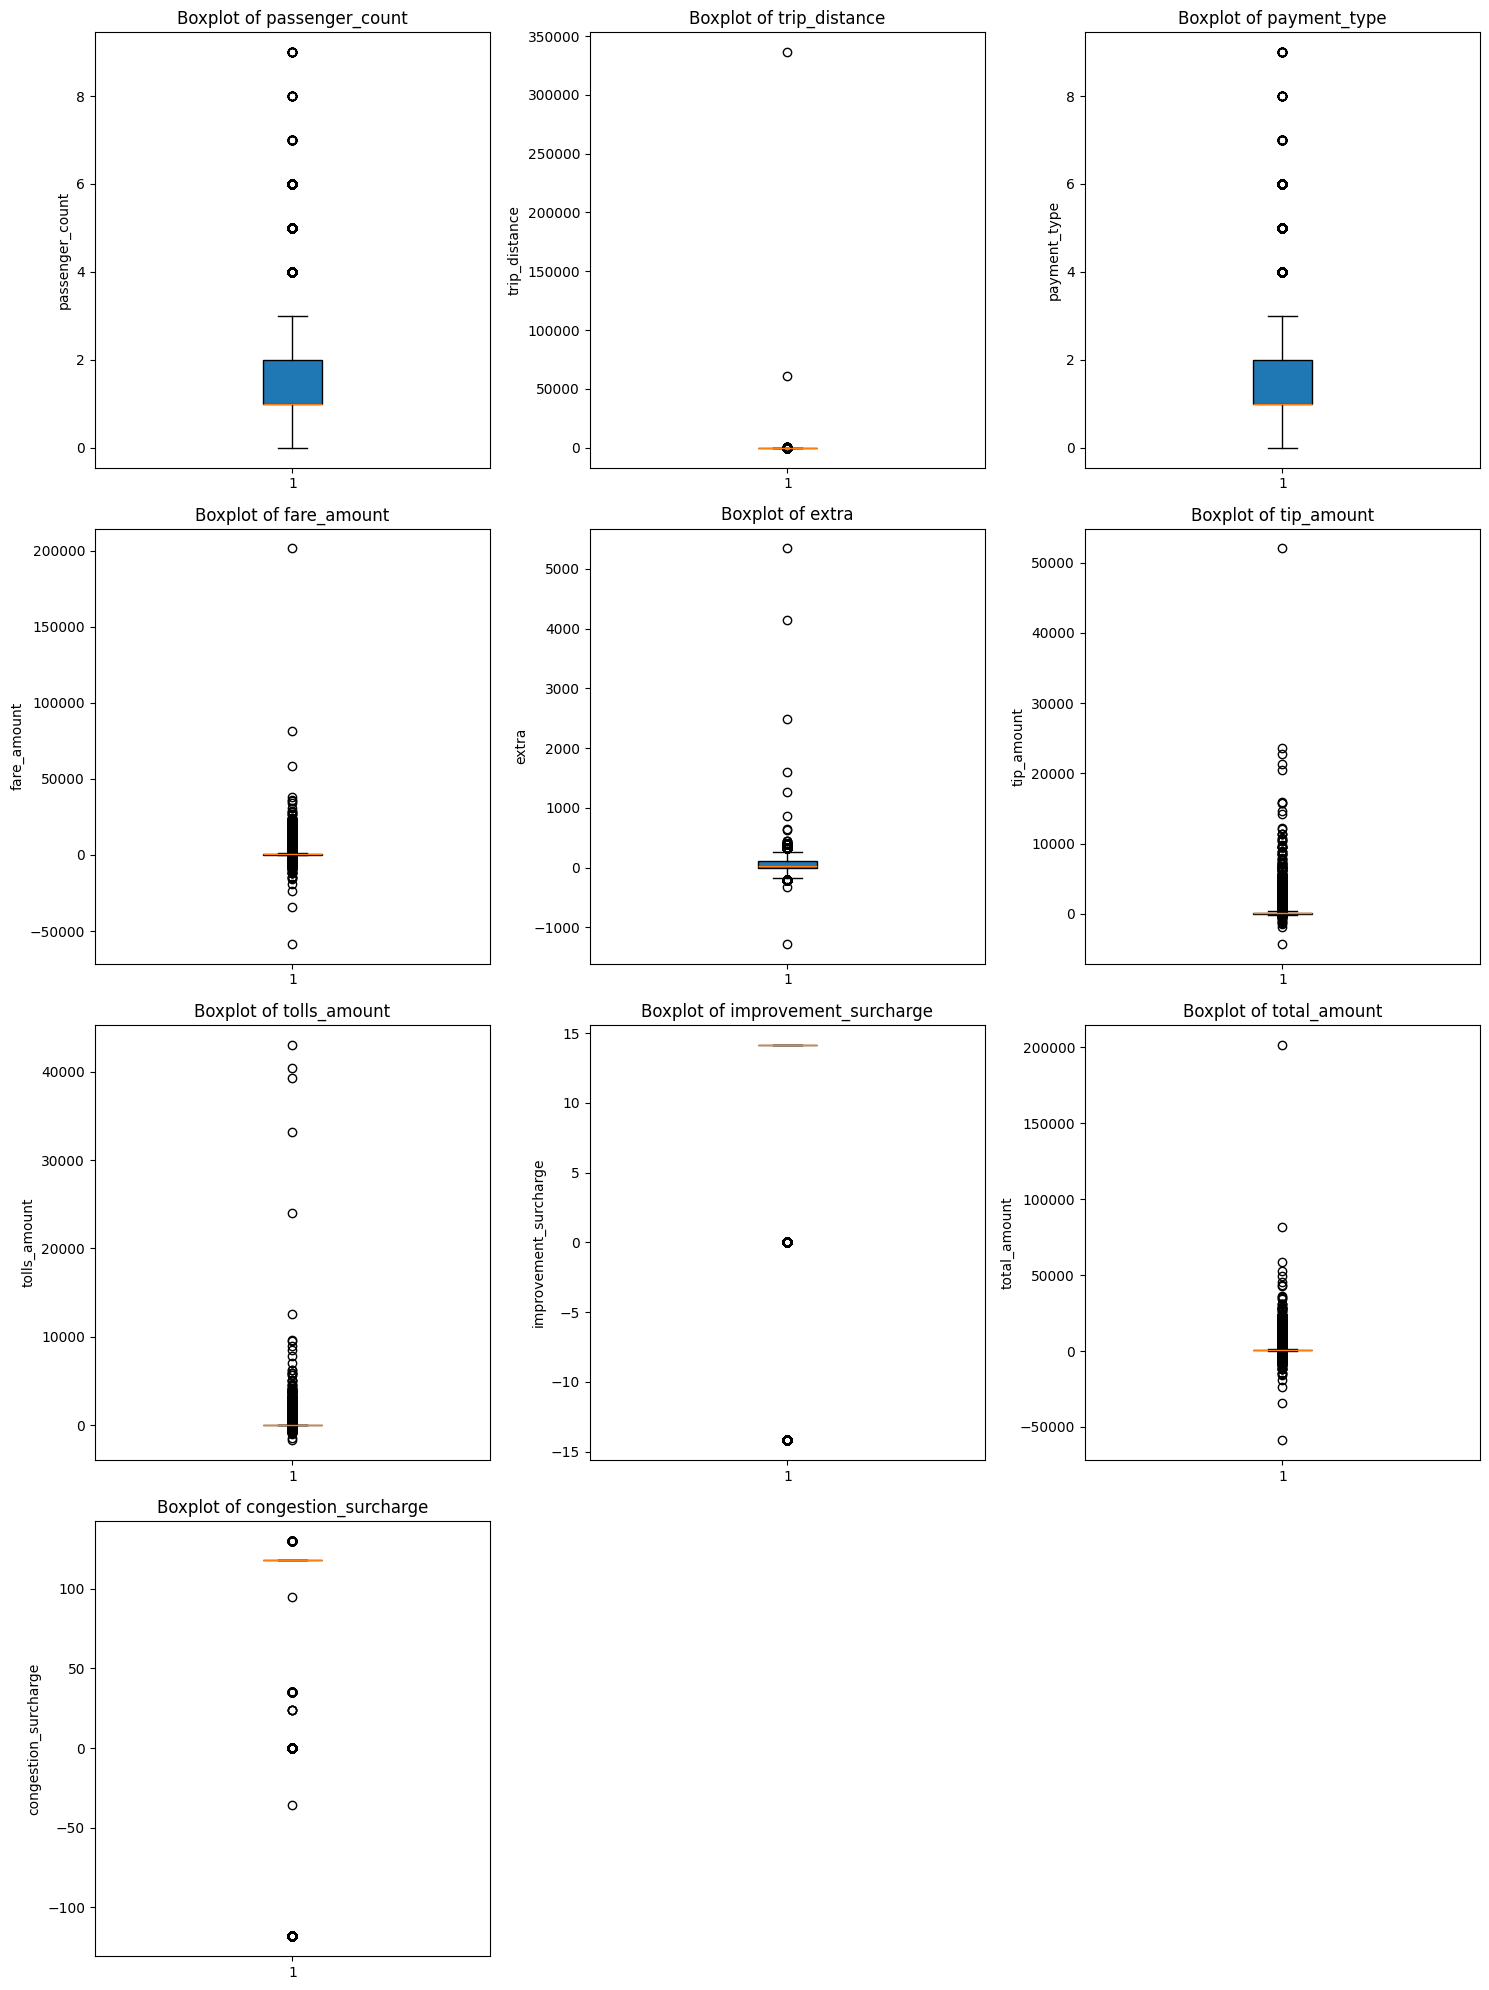

In [ ]:
# Select numeric columns
numeric_columns = ['passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
                   'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                   'total_amount', 'congestion_surcharge']

# Define subplot layout
num_cols = 3  # Number of columns in the subplot grid
num_rows = -(-len(numeric_columns) // num_cols)  # Ceiling division to get rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create boxplots for each numeric column
for i, col in enumerate(numeric_columns):
    axes[i].boxplot(uber_data[col].dropna(), patch_artist=True)  # Drop NaN values
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


####*C.Handling Outliers for all Numeric columns*

In [ ]:
#defining a common function to finding number of outliers using iqr stratergy
def find_outliers_IQR(df):

   #25 percent quantile
   q1=df.quantile(0.25)

   #75 percent quantile
   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

##### 1.`passenger_count`

In [ ]:
#finding outliers for passenger_count
outliers = find_outliers_IQR(uber_data['passenger_count'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:487951
max outlier value: 9
min outlier value: 4


In [ ]:
# Cap passenger_count outliers (≥7) as they  represent unrealistic uber ride  data.
quantile_99 = uber_data['passenger_count'].quantile(0.99)
uber_data.loc[uber_data['passenger_count'] >= 7, 'passenger_count'] = quantile_99

##### 2.`trip_distance`

In [ ]:
#finding outliers for fare_amount
outliers = find_outliers_IQR(uber_data['trip_distance'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:741286
max outlier value: 336384.1
min outlier value: -49.0


In [ ]:
# capping the trip_distance to zero and unrealstic trip distance to 99 quantile as 30km seems reasonable for a uber trip
percentile_99 = uber_data['trip_distance'].quantile(0.99)
uber_data['trip_distance'] = uber_data['trip_distance'].clip(lower=0, upper=percentile_99)

##### 3.`payment_type`

In [ ]:
outliers = find_outliers_IQR(uber_data['payment_type'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:487951
max outlier value: 9
min outlier value: 4


In [ ]:
# as the payment_type 8,9 are unknown payment_type and the data seems negligble so filtering these
uber_data = uber_data[~uber_data['payment_type'].isin([8,9])]

##### 4.`extra`

In [ ]:
outliers = find_outliers_IQR(uber_data['extra'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:8134
max outlier value: 5343.99
min outlier value: -1276.77


In [ ]:
#clipping the negative values for the extra column to zero
uber_data['trip_distance'] = uber_data['trip_distance'].clip(lower=0)
# capping the extra negative values  to zero and unrealstic extra charges to 99 quantile as 165.51 threshold  seems reasonable for a uber trip
extra_threshold = uber_data['extra'].quantile(0.99)
print(f"extra_thresold: {extra_threshold}")
uber_data['extra'] = uber_data['extra'].clip(lower=0,upper=extra_threshold)

extra_thresold: 165.51


##### 5.`gst`

In [ ]:
outliers = find_outliers_IQR(uber_data['gst'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:80503
max outlier value: 1456.46
min outlier value: -23.64


In [ ]:
gst_threshold = uber_data['gst'].quantile(0.99)
print(f"gst_thresold: {gst_threshold}")
#clipping the negative values for the gst  column to zero and unrealstic gst charges to 99 quantile as 23.64 threshold  seems reasonable for a uber trip
uber_data['gst'] = uber_data['gst'].clip(lower=0,upper=gst_threshold)

gst_thresold: 23.64


##### 6.`tip_amount`

In [ ]:
outliers = find_outliers_IQR(uber_data['tip_amount'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:292706
max outlier value: 52016.58
min outlier value: -4303.19


In [ ]:
tip_thresold = uber_data['tip_amount'].quantile(0.99)
print(f"tip_thresold: {tip_thresold}")
#clipping the negative values for the tip amount  column to zero and unrealstic tip amount  to 99 quantile as 580.69 seems reasonable for a uber trip
uber_data['tip_amount'] = uber_data['tip_amount'].clip(lower=0,upper=tip_thresold)

tip_thresold: 580.69


In [ ]:
outliers = find_outliers_IQR(uber_data['tip_amount'])

#capping at min outlier value
uber_data['tip_amount'] = uber_data['tip_amount'].clip(upper=338)

##### 7.`tolls_amount`

In [ ]:
outliers = find_outliers_IQR(uber_data['tolls_amount'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:342055
max outlier value: 43055.54
min outlier value: -1690.06


In [ ]:
toll_amount_threeshold = uber_data['tolls_amount'].quantile(0.99)
#clipping the negative values for the toll amount  column to zero and unrealstic toll  amount  to 99 quantile as 289.64 seems reasonable for a uber trip
uber_data['tolls_amount'] = uber_data['tolls_amount'].clip(lower=0,upper=toll_amount_threeshold)

##### 8.`improvement_surcharge`

In [ ]:
outliers = find_outliers_IQR(uber_data['improvement_surcharge'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:23909
max outlier value: 0.0
min outlier value: -14.18


In [ ]:
#clipping the negative values for the improvement_surcharge   column to zero
uber_data['improvement_surcharge'] = uber_data['improvement_surcharge'].clip(lower=0)

##### 9.`fare_amount`

In [ ]:
outliers = find_outliers_IQR(uber_data['fare_amount'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:642551
max outlier value: 201682.47
min outlier value: -58542.3


In [ ]:
# capping the fare amount  negative values  to zero and unrealstic fare amount  charges to 99 quantile as 2506rs seems reasonable for a uber trip
fare_amount_threshold = uber_data['fare_amount'].quantile(0.99)
print(f"fare_amount_threshold: {fare_amount_threshold}")
uber_data['fare_amount'] = uber_data['fare_amount'].clip(lower=0,upper=fare_amount_threshold)

fare_amount_threshold: 2506.26


##### 10. `congestion_surcharge`

In [ ]:
outliers = find_outliers_IQR(uber_data['congestion_surcharge'])

print(f"number of outliers:{len(outliers)}")

print(f"max outlier value: {outliers.max()}")

print(f"min outlier value: {outliers.min()}")

number of outliers:576944
max outlier value: 130.04
min outlier value: -118.22


In [ ]:
#clipping negative values for  congestion_surchare to zero as they are unrealisitic

uber_data['congestion_surcharge'] = uber_data['congestion_surcharge'].clip(lower=0)

##### 11.`total_amount`

In [ ]:
# Assigning total_amount to 0 if fare_amount, extra, GST, tip_amount, tolls_amount, and improvement_surcharge are all 0.

condition = ( uber_data['total_amount']) < 0 & (uber_data['fare_amount'] == 0) & (uber_data['extra'] == 0) & (uber_data['gst'] == 0) & (uber_data['tip_amount'] == 0) & (uber_data['tolls_amount'] == 0) & (uber_data['improvement_surcharge'] == 0) & (uber_data['congestion_surcharge'] == 0)

uber_data.loc[condition, 'total_amount'] = 0

# recalculating the total_amount as the outliers related other columns are handled
uber_data['total_amount'] = uber_data['fare_amount'] + uber_data['extra'] + uber_data['gst'] + uber_data['tip_amount'] + uber_data['tolls_amount'] + uber_data['improvement_surcharge'] + uber_data['congestion_surcharge']



##***II.Data Preparation***

### As `payment_type` is ID related to a category so  creating a new column payment_type_category as per the [given_data](https://docs.google.com/spreadsheets/d/1IiRJK-efAN5QKtTenlctBPPs61TPJUo5NeeY-4eTI4I/edit?gid=304100139#gid=304100139)

In [ ]:
payment_category_mapping = {
    0: 'Unknown',
    1: 'UPI',
    2: 'Cash',
    3: 'Credit/Debit card',
    4: 'Uber Money',
    5: 'Voided trip',
}

uber_data['payment_type_category'] = uber_data['payment_type'].map(payment_category_mapping)

In [ ]:
uber_data['payment_type_category'].unique()

array(['UPI', 'Uber Money', 'Cash', 'Credit/Debit card', nan,
       'Voided trip', 'Unknown'], dtype=object)

### Mapping PULocationID and DOLocationID to the new column Location with the given data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1IiRJK-efAN5QKtTenlctBPPs61TPJUo5NeeY-4eTI4I/gviz/tq?tqx=out:csv'

location_df = pd.read_csv(sheet_url)

# Map PULocationID (Pickup Location)
uber_data["Pickup_Location"] = uber_data["PULocationID"].map(
    dict(zip(location_df["LocationID"], location_df["Bangalore Location"]))
)

# Map DOLocationID (Dropoff Location)
uber_data["Dropoff_Location"] = uber_data["DOLocationID"].map(
    dict(zip(location_df["LocationID"], location_df["Bangalore Location"]))
)

In [ ]:
#Replacing  'Location(duplicate entry) value' with 'Location'
uber_data['Pickup_Location'] = uber_data['Pickup_Location'].str.replace(r'\s*\(duplicate entry\)', '', regex=True)

uber_data['Dropoff_Location'] = uber_data['Dropoff_Location'].str.replace(r'\s*\(duplicate entry\)', '', regex=True)


### Extracting relavant date columns from `tpep_pickup_datetime`, `tpep_dropoff_datetime` for better inshights

In [ ]:
# extracting year, month, weekday, hour from tpep_pickup_datetime
uber_data['pickup_year'] = uber_data['tpep_pickup_datetime'].dt.year
uber_data['pickup_month'] = uber_data['tpep_pickup_datetime'].dt.month
uber_data['pickup_weekday'] = uber_data['tpep_pickup_datetime'].dt.day_name()
uber_data['pickup_hour'] = uber_data['tpep_pickup_datetime'].dt.hour

# extracting year,month, weekday, hour from tpep_dropoff_datetime
uber_data['dropoff_year'] = uber_data['tpep_dropoff_datetime'].dt.year
uber_data['dropoff_month'] = uber_data['tpep_dropoff_datetime'].dt.month
uber_data['dropoff_weekday'] = uber_data['tpep_dropoff_datetime'].dt.day_name()
uber_data['dropoff_hour'] = uber_data['tpep_dropoff_datetime'].dt.hour

### Adding New Column `trip_duration` which will be difference between the `tpep_pickup_datetime`, `tpep_droff_datetime` in minutes

In [ ]:
uber_data['trip_duration'] = (uber_data['tpep_dropoff_datetime'] - uber_data['tpep_pickup_datetime']).dt.total_seconds() / 60

### Adding New Column `Idle Time`(minutes) to calculate the time interval between the drop-off of one trip and the pickup of the next trip for the same driver

In [ ]:
# First, make sure the data is properly sorted
uber_data = uber_data.sort_values(by=['VendorID', 'tpep_pickup_datetime']).copy()

# Reset the index after sorting to ensure proper grouping
uber_data = uber_data.reset_index(drop=True)

# Now calculate idle time
uber_data['prev_dropoff'] = uber_data.groupby('VendorID')['tpep_dropoff_datetime'].shift(1)
uber_data['idle_time'] = (
    (uber_data['tpep_pickup_datetime'] - uber_data['prev_dropoff']).dt.total_seconds() / 60
)

# Cleanup
uber_data['idle_time'] = uber_data['idle_time'].fillna(0).clip(lower=0, upper=60).round(2)
uber_data = uber_data.drop(columns=['prev_dropoff'])

##***III.Exploratory Data Analysis(EDA)***

**Key Metrics**

* Total Amount
* Trip Duration
* Trip Distance
* Passenger Count
* Payment Type

Dividing the analysis into four key segments to identify patterns and formulate actionable hypotheses.
1.  Time Based Analysis
2.  Location Based Analysis
3.  Operational Analysis
4.  Revenue & Payment Analysis

###1. **Time Based Analysis**

- **H1**:- Vendors who operate during early morning (5-6 AM) and evening (4-6 PM) tend to generate higher total revenue compared to other times of the day.

- **H2**:- Vendors who operate during Weekdays generate higher revenue compared to weekends

- **H3**:- Vendors generate the highest revenue in July, with notable increases in January and December, while revenue remains lower from April to June. Revenue trends improved in 2020 and 2021, showing higher variability across months.

- **H4**:- Trip volume peaks on Monday and Friday, with notable increases on Sundays. Midweek and early weekdays show lower demand compared to the beginning and end of the week.

- **H5**:- Cancellation rates peak during late afternoon and evening hours (5 PM – 7 PM), suggesting that high traffic and increased ride demand during these periods contribute to higher cancellation probabilities.

- **H6**- Cancellations are highest on Fridays and Thursdays, while Mondays and Sundays have the lowest number of cancellations.



####**Hypothesis1**:- Vendors who operate during early morning (5-6 AM) and evening (4-6 PM) tend to generate higher total revenue compared to other times of the day.

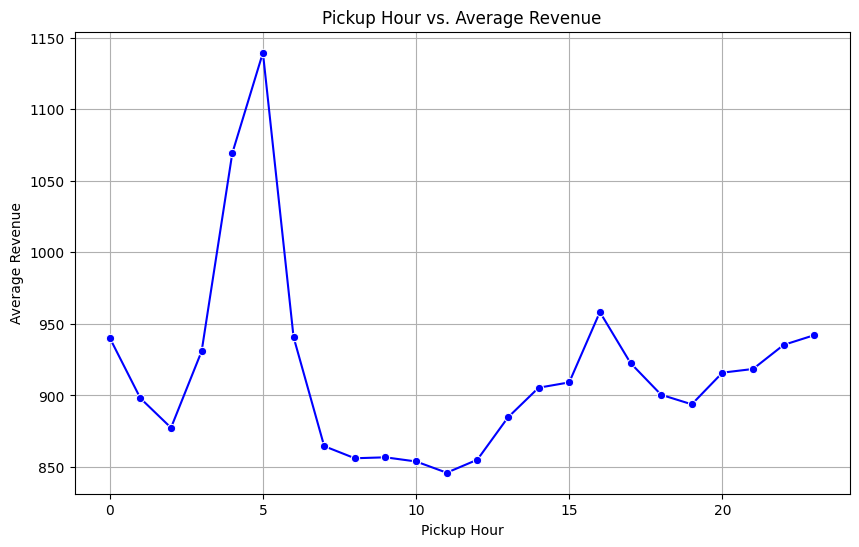

In [ ]:
#Aggregration the hourly based revenue
hourly_revenue = uber_data.groupby('pickup_hour')['total_amount'].mean()

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10, 6))

#ploting a line graph by comparing average revenue  vs pickup hour as line chart is best for datetime variable visualizations
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker='o', color='blue')

#assigning xlabel
plt.xlabel("Pickup Hour")
#assiging ylabel
plt.ylabel("Average Revenue")
#plot title
plt.title("Pickup Hour vs. Average Revenue")
# adding grid for better visualization
plt.grid(True)
# to plot only the graph without warnings
plt.show()

####**Hypothesis2**:- Vendors who operate during Weekdays generate higher revenue compared to weekends

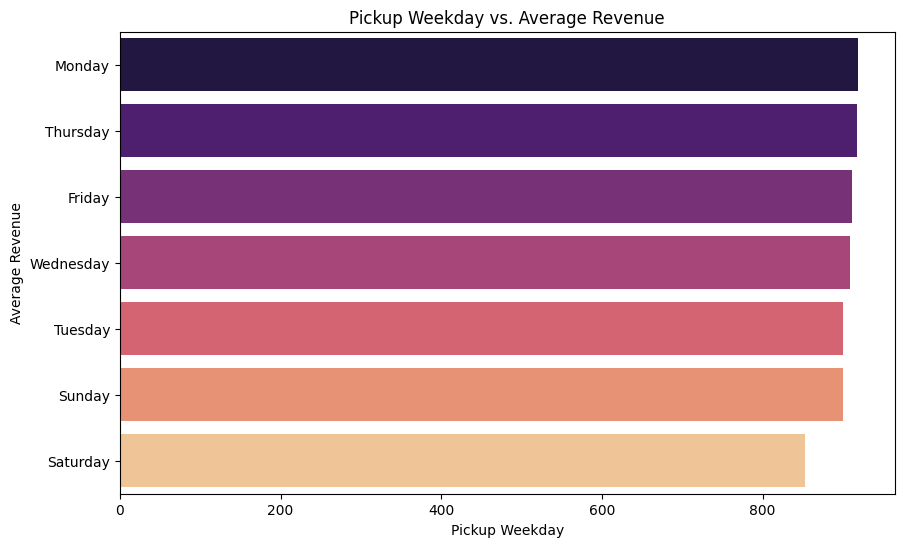

In [ ]:
#Aggregration the weekly based revenue
pickup_weekday_revenue = uber_data.groupby('pickup_weekday')['total_amount'].mean().sort_values(ascending=False)

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10, 6))

#ploting a line graph by comparing  revenue  vs pickup weekday as horizontal bar  chart is best for category variable visualizations
sns.barplot(x=pickup_weekday_revenue.values, y=pickup_weekday_revenue.index, hue=pickup_weekday_revenue.index,palette='magma', orient='h')

# Setting x and y axis labels and plot graph title
plt.xlabel('Pickup Weekday')
plt.ylabel('Average Revenue')
plt.title('Pickup Weekday vs. Average Revenue')
plt.show()

####**Hypothesis3**:- Vendors generate the highest revenue in July, with notable increases in January and December, while revenue remains lower from April to June. Revenue trends improved in 2020 and 2021, showing higher variability across months.

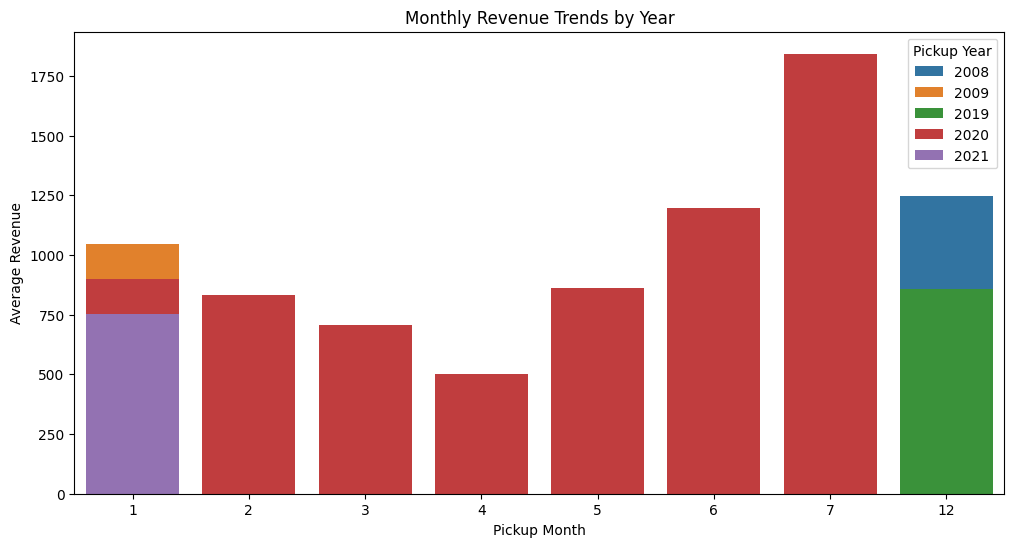

In [ ]:
# Aggregration by  both pickup_year and pickup_month
pickup_year_month_revenue = uber_data.groupby(['pickup_year', 'pickup_month'])['total_amount'].mean().reset_index()

# Considering the total amount which is greater than 0
pickup_year_month_revenue = pickup_year_month_revenue[pickup_year_month_revenue['total_amount'] > 0]

# Plot Year-Month vs. Average Revenue with Hue for Year

#plotting a fig size of width 12 and height 6
plt.figure(figsize=(12, 6))

#ploting a stacked bar graph by comparing year-month vs average revenue  using stacked bar plot to display combined variable visualization
sns.barplot(
    x=pickup_year_month_revenue['pickup_month'],
    y=pickup_year_month_revenue['total_amount'],
    hue=pickup_year_month_revenue['pickup_year'],
    palette='tab10',
    dodge=False)


# Setting x and y axis labels and plot graph title
plt.xlabel('Pickup Month')
plt.ylabel('Average Revenue')
plt.title('Monthly Revenue Trends by Year')
plt.legend(title='Pickup Year')  # Add legend for years
plt.show()

####**Hypothesis4**:- Trip volume peaks on Monday and Friday, with notable increases on Sundays. Midweek and early weekdays show lower demand compared to the beginning and end of the week.

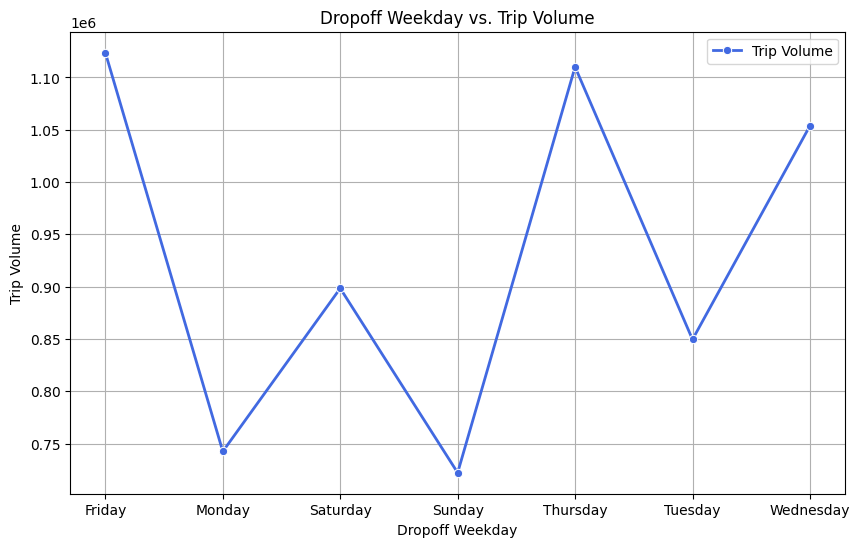

In [ ]:
 #aggregrating by dropoff_weekday with dropofftime
trip_volume_by_dropoff_weekday = uber_data.groupby('dropoff_weekday')['tpep_dropoff_datetime'].count().sort_index()

#plotting a fig size of width 12 and height 6
plt.figure(figsize=(10, 6))

#ploting a line graph by comparing average revenue  vs pickup hour as line chart is best for datetime variable visualizations
sns.lineplot(
    x=trip_volume_by_dropoff_weekday.index,
    y=trip_volume_by_dropoff_weekday.values,
    marker='o',
    linewidth=2,
    color='royalblue',
    label='Trip Volume'
)



# Setting  xlabel and ylabel and title
plt.xlabel('Dropoff Weekday')
plt.ylabel('Trip Volume')
plt.title('Dropoff Weekday vs. Trip Volume')
plt.grid()
plt.legend()

####**Hypothesis5**:- Cancellation rates peak during late afternoon and evening hours (5 PM – 7 PM), suggesting that high traffic and increased ride demand during these periods contribute to higher cancellation probabilities

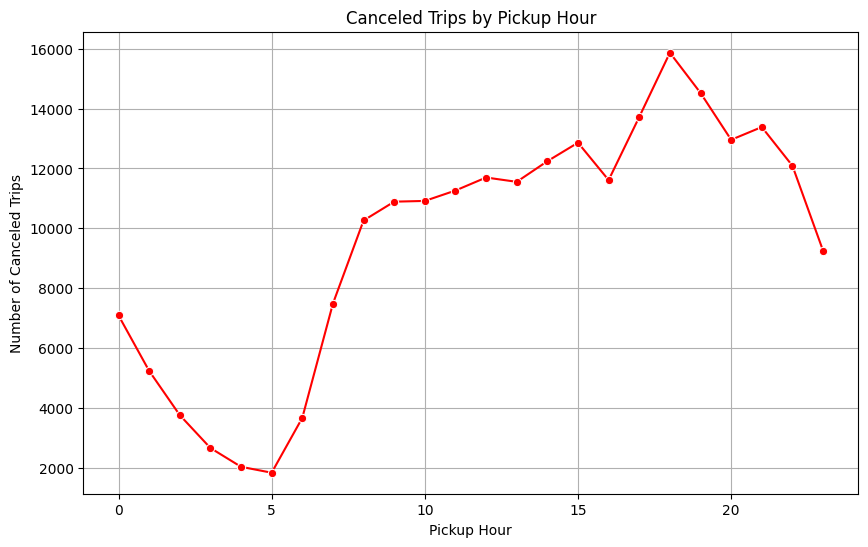

In [ ]:
#filtering the data based on payment category
canceled_trips = uber_data.loc[uber_data['payment_type_category'] == 'Voided trip']

#plotting line graph for cancellation during pickup hours

# count aggregration of cancellation by pickup hour and pickup date time
canceled_trips_by_pickup_hour = canceled_trips.groupby('pickup_hour')['tpep_pickup_datetime'].count()

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10, 6))

#ploting a line graph  cancellation during pickup hours as line chart is best for datetime variable visualizations
sns.lineplot(x=canceled_trips_by_pickup_hour.index, y=canceled_trips_by_pickup_hour.values, marker='o', color='red')

# Setting x and y axis labels and plot graph title
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Canceled Trips')
plt.title('Canceled Trips by Pickup Hour')
# adding grid for better visualization
plt.grid(True)
plt.show()

####**Hypothesis6**:-Cancellations are highest on Fridays and Thursdays, while Mondays and Sundays have the lowest number of cancellations.

<ipython-input-135-9c6f6bb45f45>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=canceled_trips_by_day.index, y=canceled_trips_by_day.values, palette='viridis')


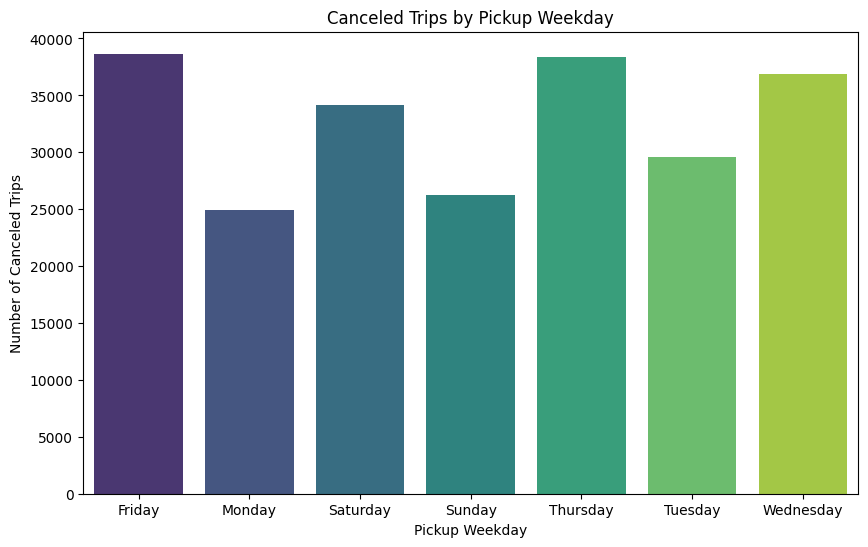

In [ ]:
# count aggregration of cancellation by pickup weekday and pickup date time
canceled_trips_by_day = canceled_trips.groupby('pickup_weekday')['tpep_pickup_datetime'].count()

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10, 6))

#ploting a bar graph  cancellation during pickup weekday as bar chart is best for categorical variable visualizations
sns.barplot(x=canceled_trips_by_day.index, y=canceled_trips_by_day.values, palette='viridis')
# Setting x and y axis labels and plot graph title
plt.xlabel('Pickup Weekday')
plt.ylabel('Number of Canceled Trips')
plt.title('Canceled Trips by Pickup Weekday')
plt.show()

###2. **Location Based Analysis**



* **H1**: Yelahanka New Town has the highest average revenue for vendors
* **H2**: Kempegowda International Airport (KIAL) is the most frequently canceled pickup location by vendors.
* **H3**: Maruthi Sevanagar has the highest toll charges on average compared to other pickup locations.
* **H4**: Bidarhalli has the highest average trip duration (> 60 mins) compared to other locations.
* **H5**: Baiyappanahalli has the highest extra charges (>100) compared to other pickup locations, likely due to peak-hour demand or surcharge policies.
* **H6**: The average revenue generated from pickups at Kalyan Nagar is significantly lower than the average revenue generated from other bottom locations.
* **H7**- Trips with 3-4 passengers, mainly from locations like Ramamurthy Nagar and Ejipura, tend to generate higher average revenue.

####**H1**:- Yelahanka New Town has the highest average revenue for vendors

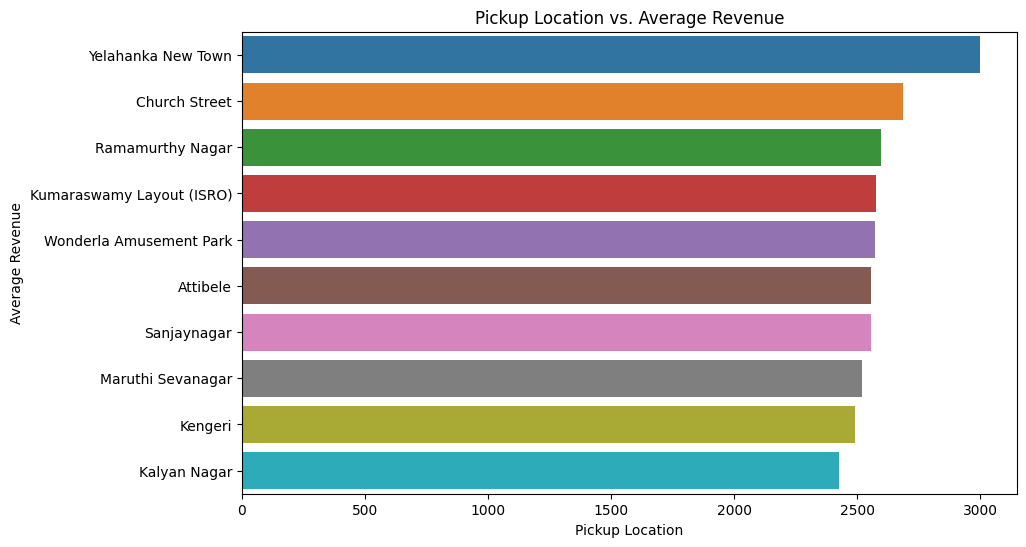

In [ ]:
#plotting location based revenue
location_based_revenue = uber_data.groupby('Pickup_Location')['total_amount'].mean().sort_values(ascending=False).head(10)

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10,6))
#ploting a bar graph  cancellation during pickup weekday as horizontal bar chart is best for categorical variable visualizations
sns.barplot(x=location_based_revenue.values,y=location_based_revenue.index, hue=location_based_revenue.index, palette='tab10',orient='h')

# Setting x and y axis labels and plot graph title
plt.xlabel('Pickup Location')
plt.ylabel('Average Revenue')
plt.title('Pickup Location vs. Average Revenue')
plt.show()

####**H2**:- Kempegowda International Airport (KIAL) is the most frequently canceled pickup location by vendors.

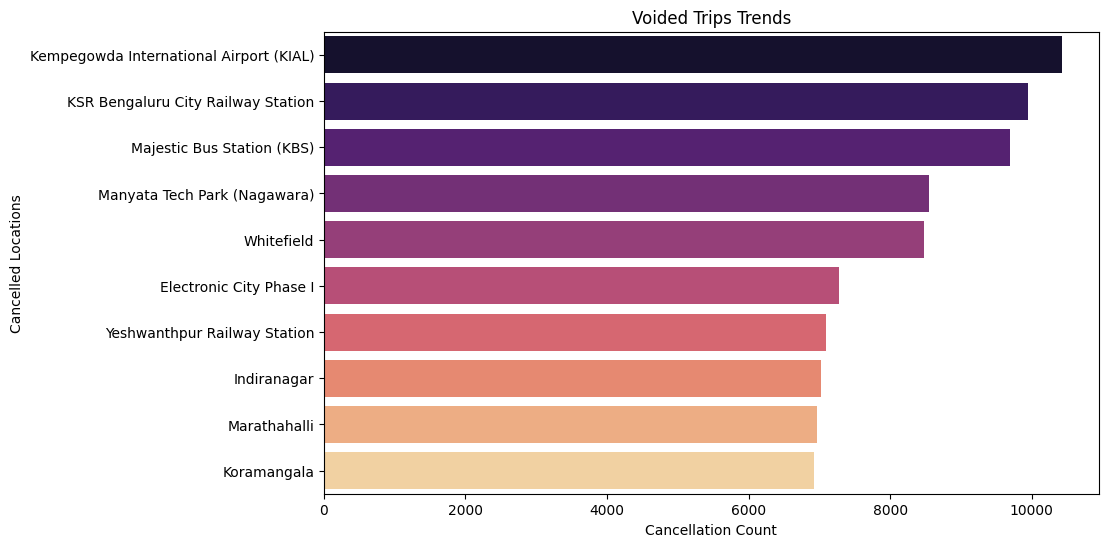

In [ ]:

# count aggregration of cancellation by pickup location
cancelled_locations = canceled_trips['Pickup_Location'].value_counts().sort_values(ascending=False).head(10)
#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10,6))
#ploting a bar graph  cancellation trip by pickup location as bar chart is best for categorical variable visualizations and limiting top 10 locations out of 216
sns.barplot(x=cancelled_locations.values,y=cancelled_locations.index, hue=cancelled_locations.index, palette='magma',orient='h')

# Setting x and y axis labels and plot graph title
plt.xlabel('Cancellation Count')
plt.ylabel('Cancelled Locations')
plt.title('Voided Trips Trends')
plt.show()

####**H3**: Maruthi Sevanagar has the highest toll charges on average compared to other pickup locations.

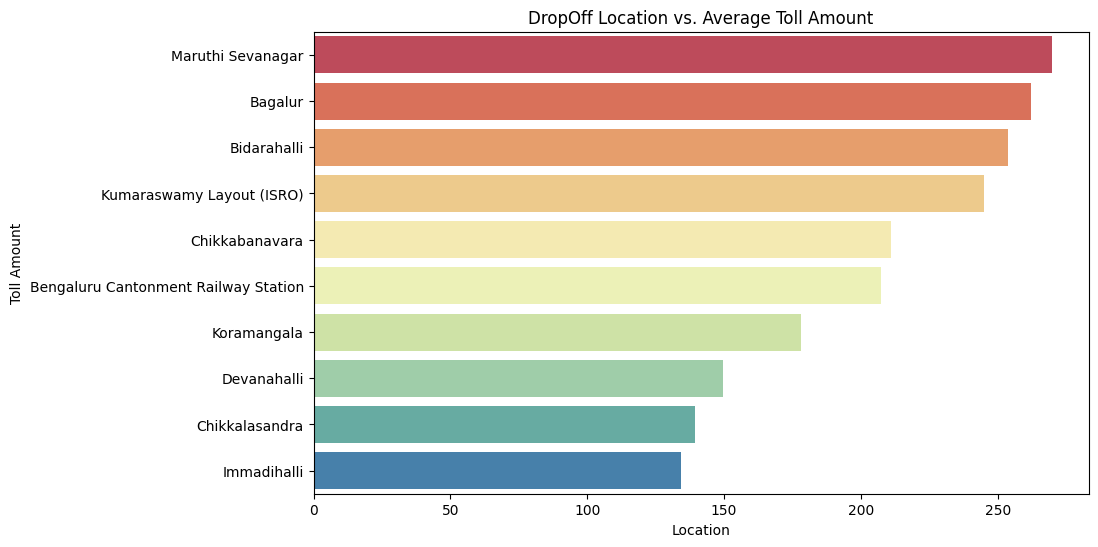

In [ ]:
#plotting a bar graph to understand trend of most toll amount location

# average  toll  amount aggregration by dropoff location
location_based_total_revenue = uber_data.groupby('Dropoff_Location')['tolls_amount'].mean().sort_values(ascending=False).head(10)

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10,6))

#ploting a bar graph toll  amount aggregration by dropoff location  as bar chart is best for categorical variable visualizations and limiting top 10 locations out of 216
sns.barplot(x=location_based_total_revenue.values,y=location_based_total_revenue.index, hue=location_based_total_revenue.index, palette='Spectral',orient='h')

# Setting x and y axis labels and plot graph title
plt.xlabel('Location')
plt.ylabel('Toll Amount')
plt.title('DropOff Location vs. Average Toll Amount')
plt.show()

####**H4**: Bidarhalli has the highest average trip duration (> 60 mins) compared to other locations.

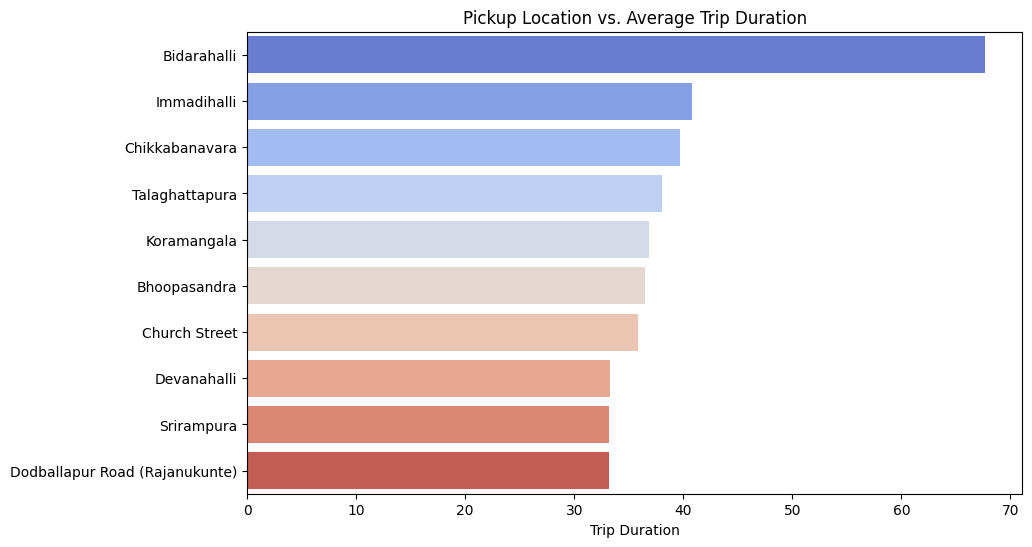

In [ ]:
#plotting a bar graph to understand trend of most trip  duration location

# average  trip duration in minute   aggregration by pickup location
trip_duration_by_location = uber_data.groupby('Pickup_Location')['trip_duration'].mean().sort_values(ascending=False).head(10)

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10,6))

#ploting a bar graph toll  amount aggregration by dropoff location  as bar chart is best for categorical variable visualizations and limiting top 10 locations out of 216
sns.barplot(x=trip_duration_by_location.values,y=trip_duration_by_location.index, hue=trip_duration_by_location.index, palette='coolwarm',orient='h')


# Setting x and y axis labels and plot graph title
plt.xlabel('Trip Duration')
plt.ylabel('')
plt.title('Pickup Location vs. Average Trip Duration')
plt.show()

####**H5**:- Baiyappanahalli has the highest extra charges (>100) compared to other pickup locations, likely due to peak-hour demand or surcharge policies.

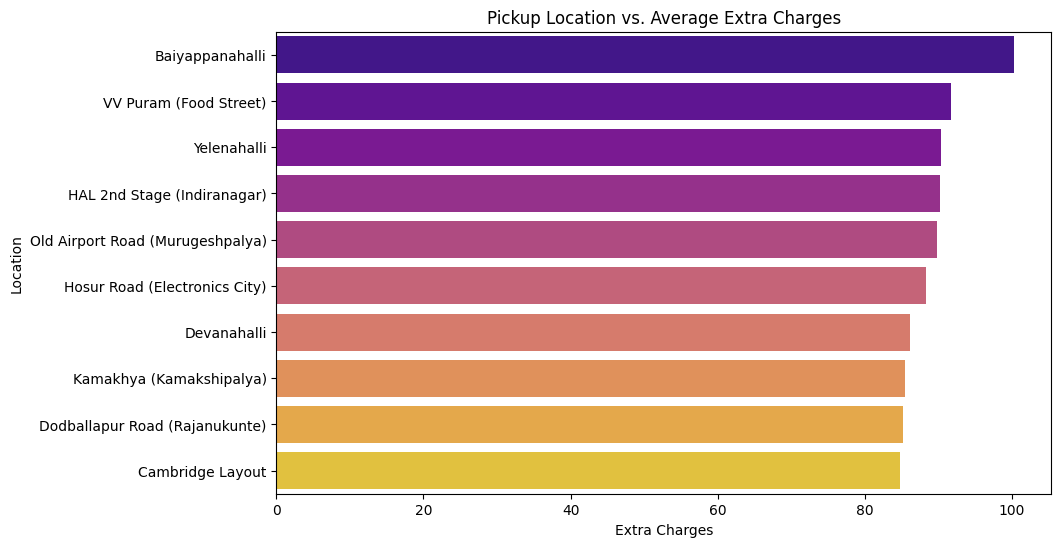

In [ ]:
#plotting a horizontal bar graph to understand trend of most extra charges based location

# average  extra charges  aggregration by pickup location
location_based_extra = uber_data.groupby(['Pickup_Location'])['extra'].mean().sort_values(ascending=False).head(10)

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10,6))

#ploting a bar graph average  extra charges  aggregration by pickup location  as horizontal bar chart is best for categorical variable visualizations and limiting top 10 locations out of 216
sns.barplot(x=location_based_extra.values,y=location_based_extra.index, hue=location_based_extra.index, palette='plasma',orient='h')

# Setting x and y axis labels and plot graph title

plt.xlabel('Extra Charges')
plt.ylabel('Location')
plt.title('Pickup Location vs. Average Extra Charges')
plt.show()

####**H6**:-The average revenue generated from pickups at Kalyan Nagar is significantly lower than the average revenue generated from other bottom locations.



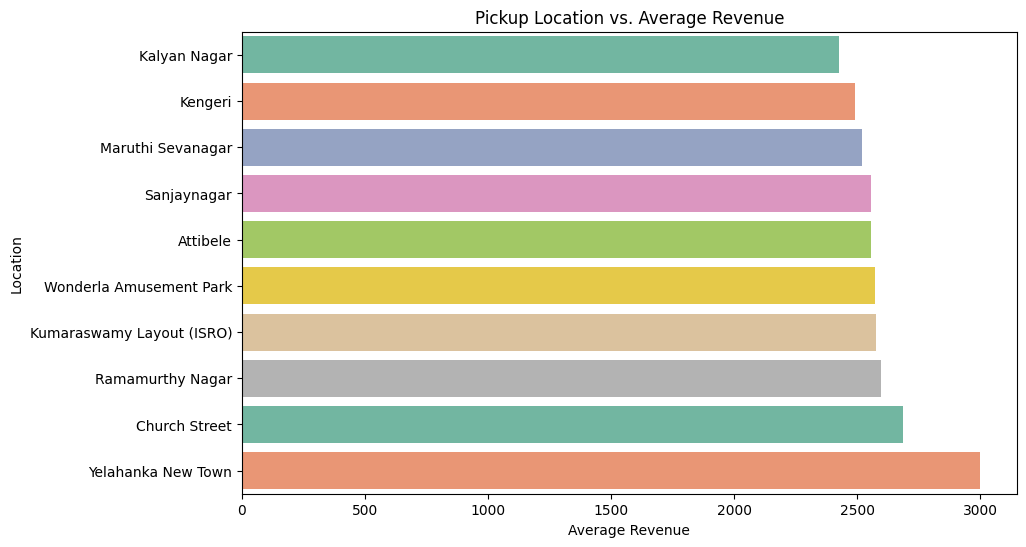

In [ ]:
#plotting a horizontal bar graph to understand least reveneue  trend  based on location

# average  total amount  aggregration by pickup location
bottom_10_locations_revenue = uber_data.groupby('Pickup_Location')['total_amount'].mean().sort_values(ascending=True).tail(10)

#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10,6))
#ploting a  total amount  aggregration by pickup location   as horizontal bar chart is best for categorical variable visualizations and limiting top 10 locations out of 216
sns.barplot(x=bottom_10_locations_revenue.values,y=bottom_10_locations_revenue.index, hue=bottom_10_locations_revenue.index, palette='Set2',orient='h')

# Setting x and y axis labels and plot graph title
plt.xlabel('Average Revenue')
plt.ylabel('Location')
plt.title('Pickup Location vs. Average Revenue')
plt.show()

####**H7**:-Trips with 3-4 passengers, mainly from locations like Ramamurthy Nagar and Ejipura, tend to generate higher average revenue.

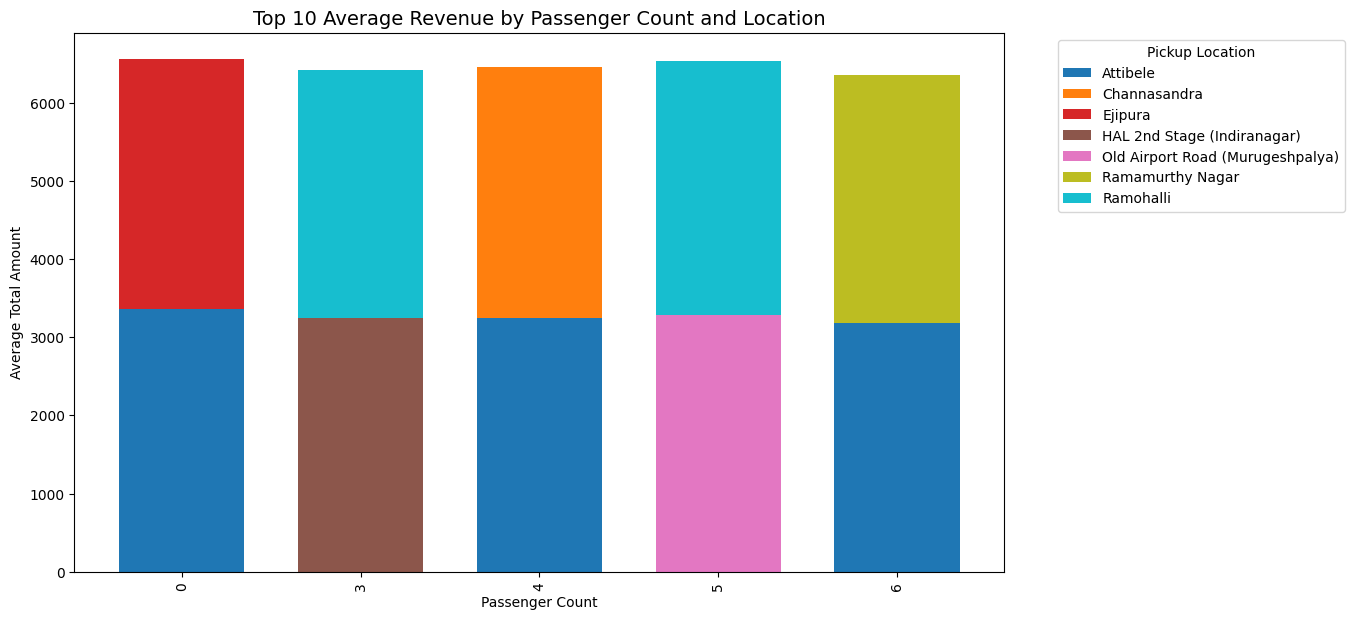

In [ ]:


# Aggregation by passenger count and location
revenue_by_passenger_location = (
    uber_data.groupby(['passenger_count', 'Pickup_Location'])['total_amount']
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Pivot the data for a stacked bar plot
pivot_data = revenue_by_passenger_location.pivot(
    index='passenger_count', columns='Pickup_Location', values='total_amount'
)

# Plotting stacked bar graph
pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab10',
    width=0.7
)

# Setting labels and title
plt.xlabel('Passenger Count')
plt.ylabel('Average Total Amount')
plt.title('Top 10 Average Revenue by Passenger Count and Location', fontsize=14)
plt.legend(title='Pickup Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###3.**Operational Analysis**

* **H1**: Idle time peaks between 3:00 AM – 5:00 AM and drops significantly after 6:00 AM, staying minimal from 12:00 PM – 6:00 PM. A slight increase is seen after 9:00 PM.
* **H2**- Pickup locations such as Attibele generate the highest average revenue between 10 AM and 8 PM, while Ramohalli, Wonderla Amusement Park, and Yelachenahalli show consistent revenue across multiple pickup hours.
* **H3**-  Higher passenger counts during peak pickup hours (5-6 AM) generate the highest average total revenue, with passenger counts between 3 to 5 contributing the most. Beyond this range, additional passengers have minimal impact on increasing total fare.
* **H4** - The average trip duration has decreased over time, with occasional fluctuations, indicating a shift toward shorter and more efficient trips.

* **H5**: The number of canceled trips remained low and stable across previous years but showed a significant increase in 2020.

* **H6**: Bagalur has the highest idle time after dropoff, followed by Immadihalli and Karthik Nagar. Idle time is lowest in Sompura and Nagadevanahalli.

* **H7**:Short-distance trips (0-5 km) account for the highest number of cancellations, with a sharp decline in cancellations as the trip distance increases.

* **H8**:Trips with 5 passengers account for 100% of the canceled trips, suggesting that group rides with maximum capacity are more likely to be canceled.

####H1: Idle time peaks between 3:00 AM – 5:00 AM and drops significantly after 6:00 AM, staying minimal from 12:00 PM – 6:00 PM. A slight increase is seen after 9:00 PM.

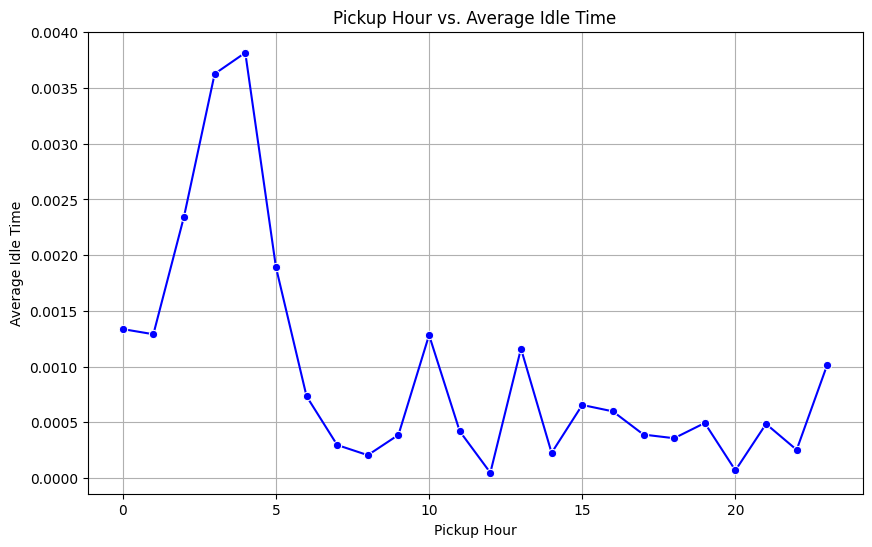

In [ ]:
#aggregrating idle time by pickup_hour
idle_time_by_pickup_hour = uber_data.groupby('pickup_hour')['idle_time'].mean().sort_values(ascending=False)


#plotting a fig size of width 10 and height 6
plt.figure(figsize=(10,6))

#ploting a line graph by comparing average revenue  vs pickup hour as line chart is best for datetime variable visualizations
sns.lineplot(x=idle_time_by_pickup_hour.index, y=idle_time_by_pickup_hour.values,marker='o', color='blue')

# Setting labels and title
plt.title("Pickup Hour vs. Average Idle Time")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Idle Time")
# Adding grid enable for better vissualization
plt.grid(True)
plt.show()

####**H2**:- Pickup locations such as Attibele generate the highest average revenue between 10 AM and 8 PM, while Ramohalli, Wonderla Amusement Park, and Yelachenahalli show consistent revenue across multiple pickup hours.

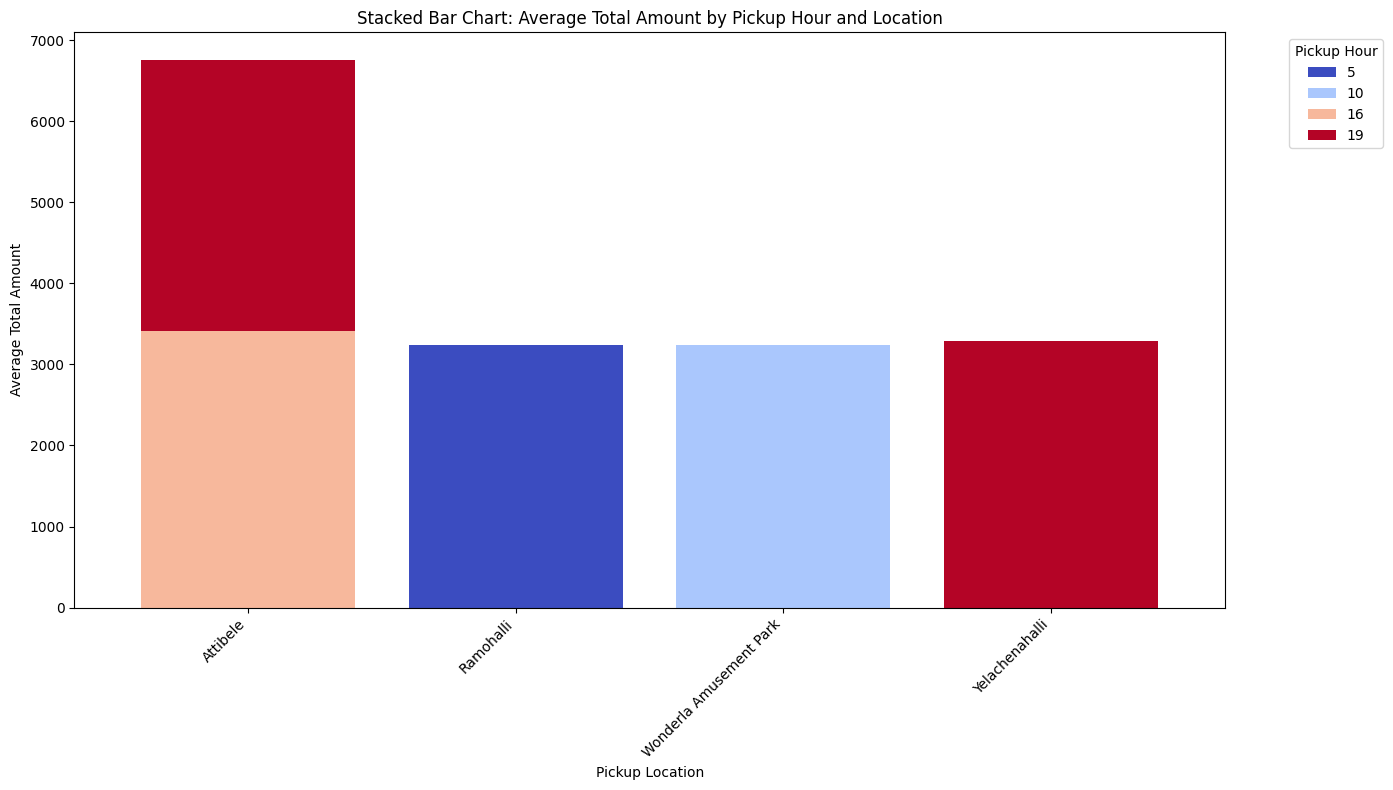

In [ ]:
# Aggregation: Total amount by pickup_hour and location
vendor_location_revenue = (
    uber_data.groupby(['pickup_hour', 'Pickup_Location'])['total_amount']
    .mean()
    .round(2).nlargest(5)
    .reset_index()
)

# Pivot data for stacked bar chart
# choosing a stack bar graph as we have multiple location and multiple pickup hours
pivot_df = vendor_location_revenue.pivot_table(
    values='total_amount',
    index='Pickup_Location',
    columns='pickup_hour',
    fill_value=0
)

# Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='coolwarm',
    width=0.8
)

# setting xlabel and ylabel and total
plt.title('Stacked Bar Chart: Average Total Amount by Pickup Hour and Location')
plt.xlabel('Pickup Location')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pickup Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


####**H3**: Higher passenger counts during peak pickup hours (5-6 AM) generate the highest average total revenue, with passenger counts between 3 to 5 contributing the most. Beyond this range, additional passengers have minimal impact on increasing total fare.

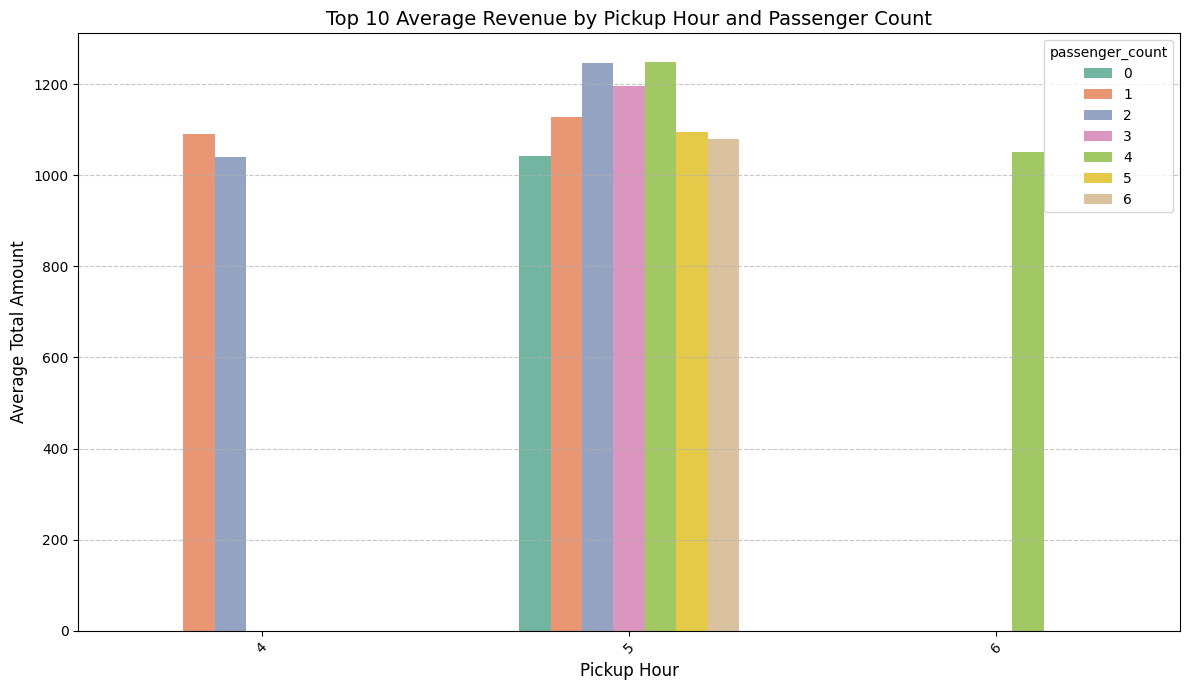

In [ ]:
# Group and calculate average revenue for pickup_hour and passenger_count
passenger_count_revenue = (
    uber_data.groupby(['pickup_hour', 'passenger_count'])['total_amount']
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Create the barplot
plt.figure(figsize=(12, 7))
sns.barplot(
    x='pickup_hour',
    y='total_amount',
    hue='passenger_count',
    data=passenger_count_revenue,
    palette='Set2',  # Updated to Set2 for better distinction
    width=0.6,
    order=sorted(passenger_count_revenue['pickup_hour'].unique()),  # Sort pickup_hour
    hue_order=sorted(passenger_count_revenue['passenger_count'].unique())  # Sort passenger_count
)


# Set labels and title
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Average Total Amount', fontsize=12)
plt.title('Top 10 Average Revenue by Pickup Hour and Passenger Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

####**H4**:The average trip duration has decreased over time, with occasional fluctuations, indicating a shift toward shorter and more efficient trips.

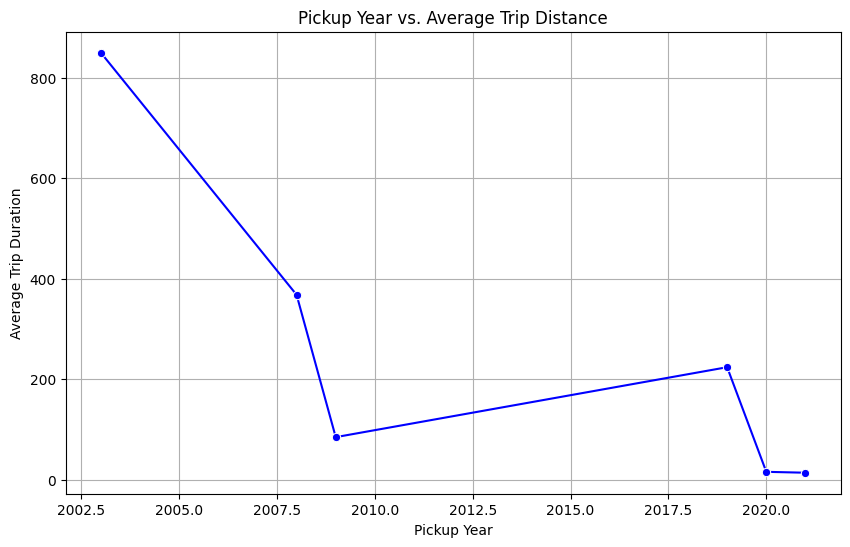

In [ ]:
#plotting the pickup years vs trip distance

pickup_year_trip_duration = uber_data.groupby('pickup_year')['trip_duration'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))

sns.lineplot(x=pickup_year_trip_duration.index, y=pickup_year_trip_duration.values, marker='o', color='blue')
plt.title("Pickup Year vs. Average Trip Distance")
plt.xlabel("Pickup Year")
plt.ylabel("Average Trip Duration")
plt.grid(True)
plt.show()

#### **H5**: The number of canceled trips remained low and stable across previous years but showed a significant increase in 2020.

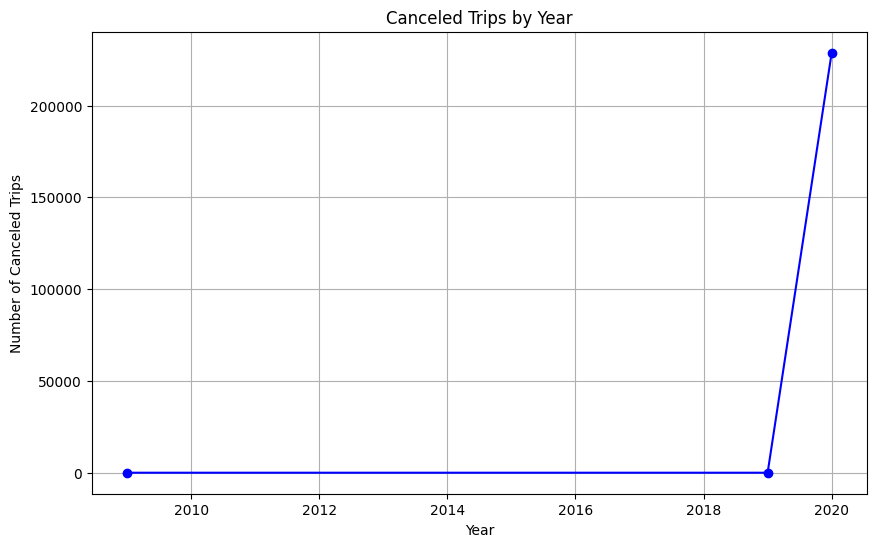

In [ ]:
# Count the number of canceled trips per year
canceled_trips = uber_data[uber_data['payment_type_category'] == 'Voided trip']
yearly_counts = canceled_trips['pickup_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='b')
plt.title('Canceled Trips by Year')
plt.xlabel('Year')
plt.ylabel('Number of Canceled Trips')
plt.grid(True)
plt.show()

####H6:Bagalur has the highest idle time after dropoff, followed by Immadihalli and Karthik Nagar. Idle time is lowest in Sompura and Nagadevanahalli.

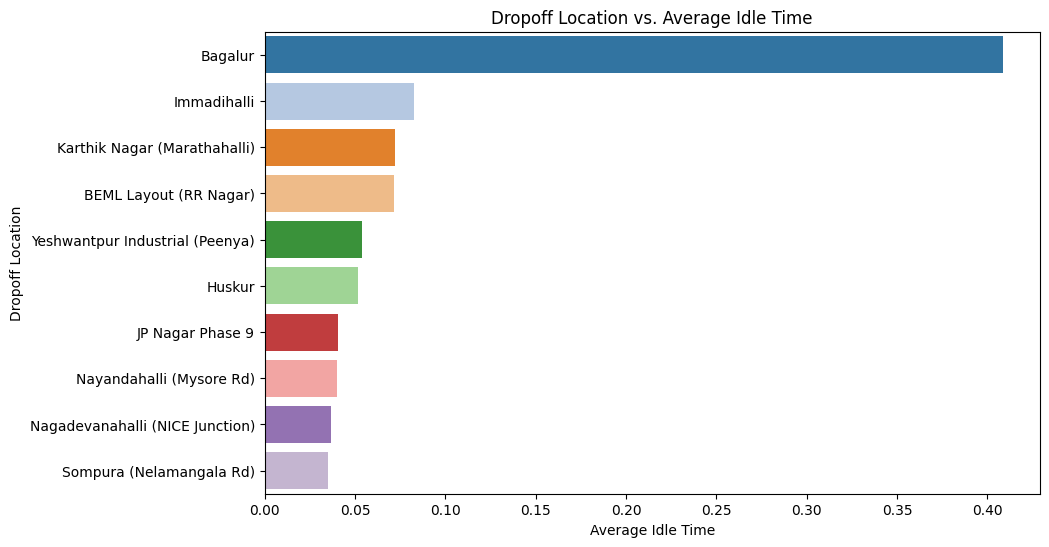

In [ ]:

#aggregartion of idle time by dropoff location
idle_time_by_dropoff_location = uber_data.groupby('Dropoff_Location')['idle_time'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=idle_time_by_dropoff_location.values,y=idle_time_by_dropoff_location.index, hue=idle_time_by_dropoff_location.index, palette='tab20',orient='h')
plt.xlabel('Average Idle Time')
plt.ylabel('Dropoff Location')
plt.title('Dropoff Location vs. Average Idle Time')
plt.show()

####H7:Short-distance trips (0-5 km) account for the highest number of cancellations, with a sharp decline in cancellations as the trip distance increases.

<ipython-input-149-8d810c9f63b1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.cut(canceled_trips['trip_distance'], bins=bins, labels=labels))['tpep_pickup_datetime']
<ipython-input-149-8d810c9f63b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trip_distance', y='tpep_pickup_datetime', data=canceled_trips_by_distance, palette='tab10')


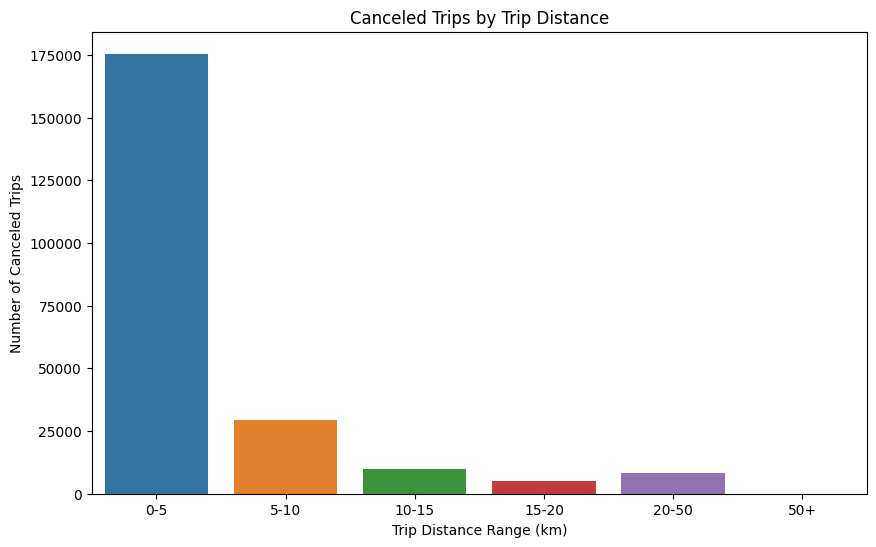

In [ ]:
# Group trip distances into bins on the fly
bins = [0, 5, 10, 15, 20, 50, 100]
labels = ['0-5', '5-10', '10-15', '15-20', '20-50', '50+']

# Use pd.cut inside groupby without adding a new column
canceled_trips_by_distance = (
    canceled_trips
    .groupby(pd.cut(canceled_trips['trip_distance'], bins=bins, labels=labels))['tpep_pickup_datetime']
    .count()
    .reset_index()
    .dropna()
)

plt.figure(figsize=(10, 6))
sns.barplot(x='trip_distance', y='tpep_pickup_datetime', data=canceled_trips_by_distance, palette='tab10')
plt.xlabel('Trip Distance Range (km)')
plt.ylabel('Number of Canceled Trips')
plt.title('Canceled Trips by Trip Distance')
plt.show()

####H8: Trips with 5 passengers account for 100% of the canceled trips, suggesting that group rides with maximum capacity are more likely to be canceled.

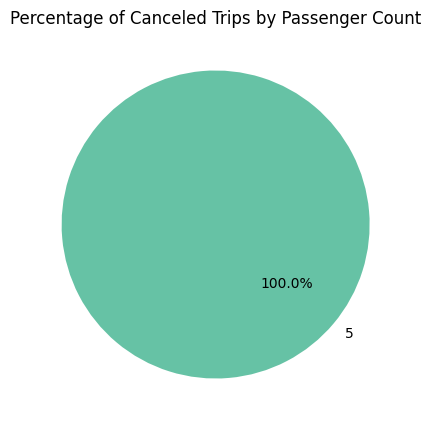

In [ ]:
#count aggregration of cancelled trip by passenger count
canceled_trips_by_passenger_count =   canceled_trips.groupby('passenger_count')['tpep_pickup_datetime'].count().sort_values(ascending=False).reset_index()

# plotting figsize
plt.figure(figsize=(5, 5))  #
plt.pie(canceled_trips_by_passenger_count['tpep_pickup_datetime'],
        labels=canceled_trips_by_passenger_count['passenger_count'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Percentage of Canceled Trips by Passenger Count')
plt.show()

###4. **Revenue & Payment Analysis**

* **H1**- Congestion surcharges peak around 8-10 AM and dip around 4-5 AM, reflecting traffic patterns.
* **H2**- Congestion surcharges remain relatively consistent across the top 10 pickup locations. This suggests that location has minimal impact on congestion surcharge variations
* **H3**- Improvement surcharges tend to be slightly lower during early morning hours (around 4-5 AM) and peak slightly after 6 AM
* **H4**- Tip amounts are generally higher during evening hours (16:00 - 22:00) compared to other times. This suggests passengers tend to tip more during peak evening periods.
* **H5**- The number of canceled trips peaks between 18:00 and 20:00, suggesting that high demand during these hours leads to increased trip cancellations.
* **H6**- Rides paid in UPI yield the highest average revenue compared to all other payment types.


####**H1**: Congestion surcharges peak around 8-10 AM and dip around 4-5 AM, reflecting traffic patterns.

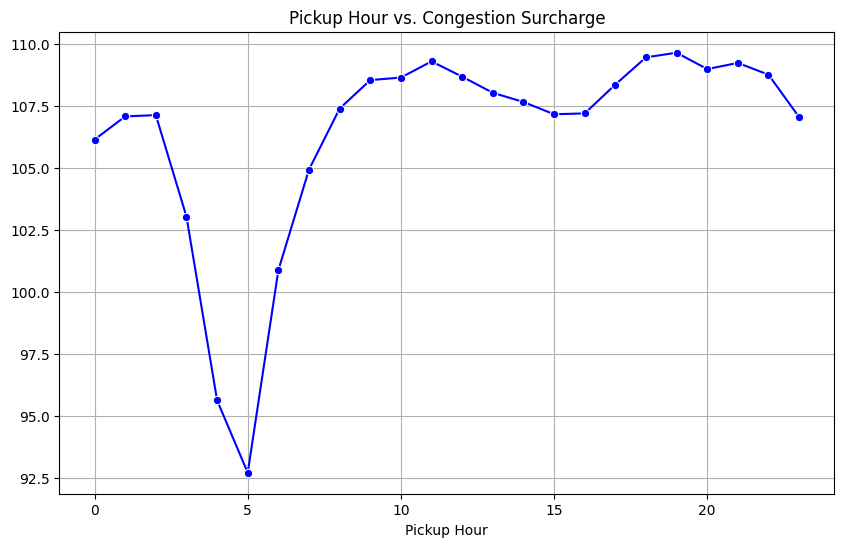

In [ ]:
#plotting trend line on Congestion Surcharege vs Pickup Hours

congestion_surcharge_by_hour  = uber_data.groupby('pickup_hour')['congestion_surcharge'].mean().sort_values(ascending=False)
#plotting figure of size 10,6(1000*600)
plt.figure(figsize=(10,6))
sns.lineplot(x=congestion_surcharge_by_hour.index, y=congestion_surcharge_by_hour.values,marker='o', color='blue')
plt.title("Pickup Hour vs. Congestion Surcharge")
plt.xlabel("Pickup Hour")
plt.grid(True)
plt.show()

####**H2**: Congestion surcharges remain relatively consistent across the top 10 pickup locations. This suggests that location has minimal impact on congestion surcharge variations

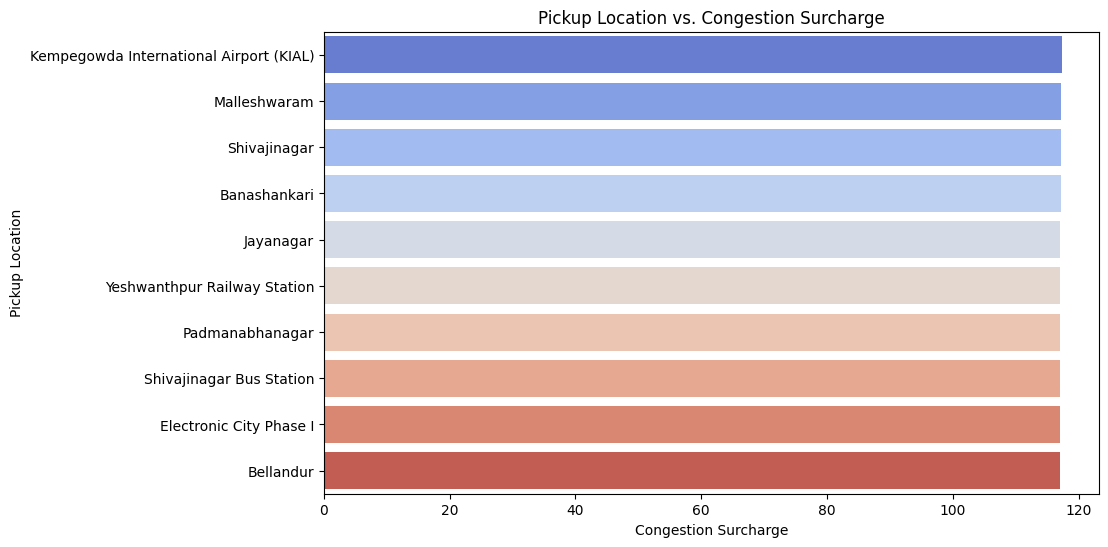

In [ ]:
#plotting bar  graph  on Congestion Surcharege vs Pickup Location


congestion_surcharge_by_location = uber_data.groupby(['Pickup_Location'])['congestion_surcharge'].mean().sort_values(ascending=False).nlargest(10).reset_index()

#plotting figure of size 10,6(1000*600)
plt.figure(figsize=(10,6))
sns.barplot(x=congestion_surcharge_by_location['congestion_surcharge'],y=congestion_surcharge_by_location['Pickup_Location'], hue=congestion_surcharge_by_location['Pickup_Location'], palette='coolwarm',orient='h')
plt.xlabel('Congestion Surcharge')
plt.ylabel('Pickup Location')
plt.title('Pickup Location vs. Congestion Surcharge')
plt.show()


####**H3**:Improvement surcharges tend to be slightly lower during early morning hours (around 4-5 AM) and peak slightly after 6 AM

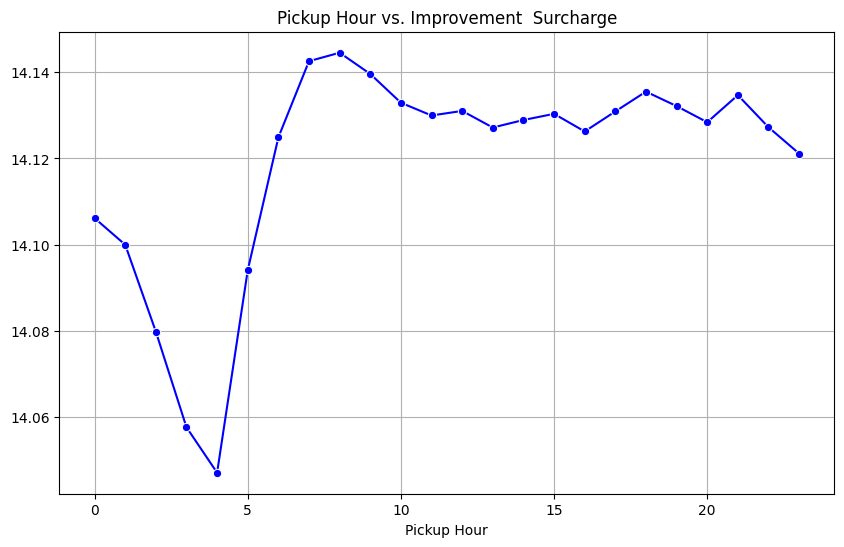

In [ ]:
improvement_surcharge_by_hour = uber_data.groupby('pickup_hour')['improvement_surcharge'].mean().sort_values(ascending=False)
#plotting figure of size 10,6(1000*600)
plt.figure(figsize=(10,6))
sns.lineplot(x=improvement_surcharge_by_hour.index, y=improvement_surcharge_by_hour.values,marker='o', color='blue')
plt.title("Pickup Hour vs. Improvement  Surcharge")
plt.xlabel("Pickup Hour")
plt.grid(True)
plt.show()


####H4: Tip amounts are generally higher during evening hours (16:00 - 22:00) compared to other times. This suggests passengers tend to tip more during peak evening periods.

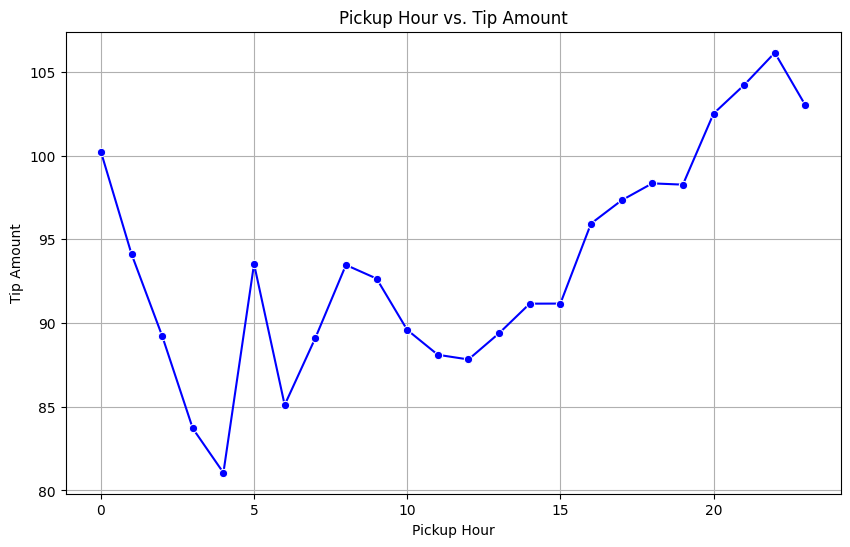

In [ ]:
tipping_by_hour = uber_data.groupby('pickup_hour')['tip_amount'].mean().sort_values(ascending=False)
#plotting figure of size 10,6(1000*600)
plt.figure(figsize=(10,6))
sns.lineplot(x=tipping_by_hour.index, y=tipping_by_hour.values,marker='o', color='blue')
plt.title("Pickup Hour vs. Tip Amount")
plt.xlabel("Pickup Hour")
plt.ylabel("Tip Amount")
plt.grid(True)
plt.show()


####**H5**: The number of canceled trips peaks between 18:00 and 20:00, suggesting that high demand during these hours leads to increased trip cancellations.

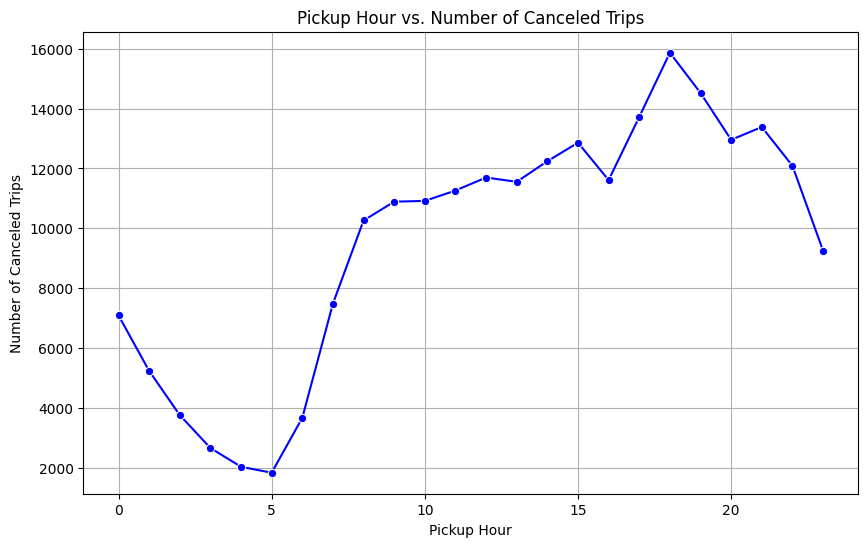

In [ ]:
canceled_trips['pickup_hour'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.lineplot(x=canceled_trips['pickup_hour'].value_counts().sort_values(ascending=False).index, y=canceled_trips['pickup_hour'].value_counts().sort_values(ascending=False).values,marker='o', color='blue')
plt.title("Pickup Hour vs. Number of Canceled Trips")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Canceled Trips")
plt.grid(True)
plt.show()

####**H6**- Rides paid in UPI yield the highest average revenue compared to all other payment types.

In [ ]:
uber_data.payment_type_category.value_counts()

,count
payment_type_category,
UPI,4683588
Cash,959137
Credit/Debit card,253553
Voided trip,228784
Uber Money,125124
Unknown,115771


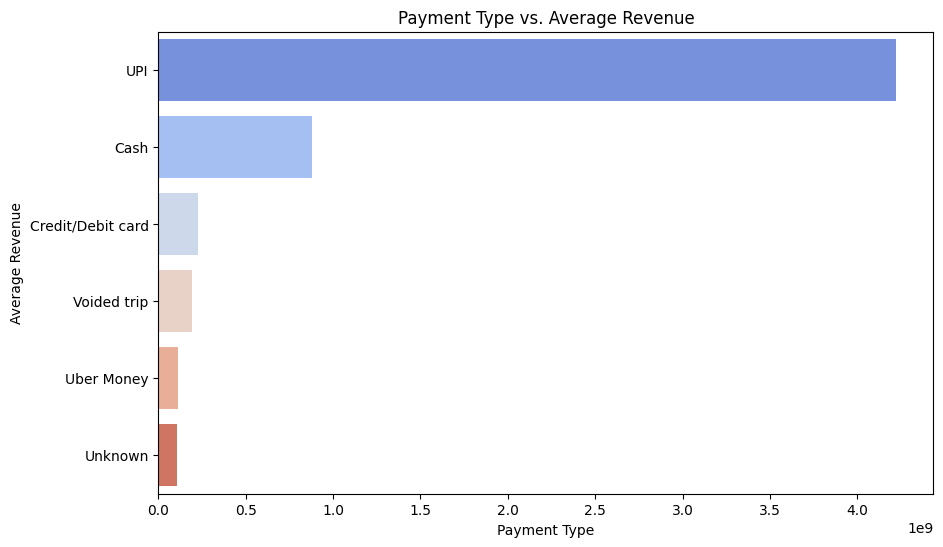

In [ ]:
payment_by_revenue = uber_data.groupby('payment_type_category')['total_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=payment_by_revenue.values,y=payment_by_revenue.index, hue=payment_by_revenue.index, palette='coolwarm',orient='h')
plt.xlabel('Payment Type')
plt.ylabel('Average Revenue')
plt.title('Payment Type vs. Average Revenue')
plt.show()


### Downloading the final dataset

In [ ]:
# # Dropping  unnecessary columns
# final_data = uber_data.drop(columns=[
#     'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour',
#     'dropoff_year', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour',
#     'payment_type'
# ])



# # Display the final dataset
# display(final_data.head())

# #downloading the dataset
# from google.colab import files

# # Save the file locally in Colab
# final_data.to_csv('final_uber_data.csv', index=False)

# # Download the file to your laptop
# files.download('final_uber_data.csv')

#Insights and Recommendations

## Revenue per Driver Hour (RDH)

## Insights
### Time-Based Revenue Patterns
- Drivers earn the most during early morning (5-6 AM) and evening (4-6 PM) due to commuter demand.
- Weekdays outperform weekends, with **July, January, and December** being the top revenue-generating months.

### Location-Based Revenue Disparities
- Yelahanka New Town has the highest average revenue per driver, while Kalyan Nagar consistently underperforms.

### Trip Type Impact on Revenue
- Trips with 3-4 passengers generate higher revenue, especially during peak hours.
- Short-distance trips (0-5 km) and 5-passenger trips suffer from high cancellation rates, with the latter showing a 100% cancellation rate.

## Recommendations
### Aggressive Peak-Time Incentives
- Offer tiered surge bonuses (e.g., +20% for 5 trips, +30% for 10 trips) during 5-6 AM and 4-6 PM to maximize driver availability.
- Launch a "Weekday Warrior" program with a 50-100rs bonus for completing 20+ trips on Mondays and Fridays.

### Location-Optimized Deployment
- Implement a geofenced surge multiplier (1.5x fares) in Yelahanka New Town during peak hours.
- Introduce a "Revenue Recovery Plan" in Kalyan Nagar with a minimum hourly rate guarantee (e.g., 200/hour) to maintain service levels.

### Trip Type Overhaul
- Prioritize 3-4 passenger trips with a 10% revenue kicker per ride.
- Impose a 50-100 rs cancellation fee on short-distance and 5-passenger trips, with 50% redistributed to drivers.

---

# Fleet Efficiency

## Insights
### Trip Volume and Duration Trends
- Trip volume peaks on Mondays, Fridays, and Sundays, with a trend toward shorter, more efficient trips.
- Bidarhalli has the longest average trip duration (>60 minutes), limiting trip frequency.



### Capacity Utilization
- Trips with 3-4 passengers during peak hours optimize vehicle use, while 5-passenger trips have high cancellation rates.

## Recommendations

### Trip Frequency Optimization
- Introduce a "Quick Trip Bonus" of $1 per trip for completing 5+ short rides (<20 minutes) per hour.
- For long trips in Bidarhalli, offer a 100 rs  long-trip premium and cap assignments at 1 per hour.

### Capacity Optimization
- Launch "Pool Priority Zones" with a 25% fare discount for passengers and a 50rs bonus per pooled trip for drivers during peak hours.

---

# Overall Revenue Strategies

## Insights
### Payment and Surcharge Leverage
- UPI payments yield the highest average revenue per trip.
- Congestion surcharges peak at 8-10 AM, and tips are higher during evening hours (4-10 PM).

### Cancellation Revenue Drain
- Cancellations spike during 5 PM – 7 PM and on Fridays and Thursdays, especially for short-distance and 5-passenger trips.

### Seasonal and Location Revenue Peaks
- **July, January, and December** are the highest-revenue months.
- Attibele generates strong revenue between 10 AM – 8 PM, and Yelahanka New Town leads in location-based earnings.

## Recommendations
### Precision Pricing
- Deploy block-by-block surge pricing during peak hours (5-6 AM, 4-6 PM) for a 20-30% revenue lift.
- Increase congestion surcharges by 50% during 8-10 AM in high-traffic zones.

### Cancellation Revenue Recovery
- Implement a tiered cancellation penalty (50rs for short trips, 100rs for 5-passenger trips), with 75% redistributed to drivers.
- Offer a 150rs resilience bonus per completed trip during high-cancellation periods (5 PM – 7 PM, Fridays, Thursdays).

### Payment and Tipping Boost
- Provide a 1% payout bonus to drivers for UPI-paid trips and a 5% fare discount to passengers using UPI.
- Run a "Double Tip Match" campaign during 4-10 PM, with Uber matching tips up to $5 per ride.

### Seasonal and Location Revenue Amplification
- Activate a "Seasonal Surge Lock" with a 15% fare increase in **July, January, and December**.
- Introduce a 1.3x fare multiplier in Attibele from 10 AM – 8 PM and enhance marketing in Yelahanka New Town.

---

